# This is a simple first version of a NN

Importing some stuff

In [1]:
import tensorflow as tf
import tensorflow.keras as ks
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
votes = pd.read_csv("../data/formatted/swissvotes_dataset_after_1900_utf8.csv", sep=';')
votes.head()

,anr,datum,titel_kurz_d,titel_kurz_f,titel_off_d,titel_off_f,stichwort,swissvoteslink,anzahl,rechtsform,...,ju_nein,ju_japroz,ju_annahme,bkresults_de,bkresults_fr,bfsmap_de,bfsmap_fr,nach_cockpit_d,nach_cockpit_f,nach_cockpit_e
0,56.0,20.05.1900,"Gesetz zur Kranken-, Unfall- und Militärversic...","Loi sur l'assurance maladie, accidents et mili...",Bundesgesetz betreffend die Kranken- und Unfal...,Loi fédérale sur l'assurance contre les maladi...,.,https://swissvotes.ch/vote/56.00,1,2,...,.,.,.,https://www.bk.admin.ch/ch/d/pore/va/19000520/...,https://www.bk.admin.ch/ch/f/pore/va/19000520/...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,.,.,.
1,57.0,04.11.1900,Initiative «für die Proporzwahl des Nationalra...,Initiative pour l'introduction du système prop...,Volksinitiative «für die Proporzwahl des Natio...,Initiative populaire tendant à l'introduction ...,Erste Proporzinitiative,https://swissvotes.ch/vote/57.00,2,3,...,.,.,.,https://www.bk.admin.ch/ch/d/pore/va/19001104/...,https://www.bk.admin.ch/ch/f/pore/va/19001104/...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,.,.,.
2,58.0,04.11.1900,Initiative für die Volkswahl des Bundesrates,Initiative pour la nomination du Conseil fédér...,Volksinitiative «für die Volkswahl des Bundesr...,Initiative populaire tendant à la nomination d...,.,https://swissvotes.ch/vote/58.00,2,3,...,.,.,.,https://www.bk.admin.ch/ch/d/pore/va/19001104/...,https://www.bk.admin.ch/ch/f/pore/va/19001104/...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,.,.,.
3,59.0,23.11.1902,Unterstützung der Primarschule durch den Bund,Subvention de l'école primaire publique par la...,Bundesbeschluss betreffend die Unterstützung d...,Arrêté fédéral concernant la subvention de l'é...,.,https://swissvotes.ch/vote/59.00,1,1,...,.,.,.,https://www.bk.admin.ch/ch/d/pore/va/19021123/...,https://www.bk.admin.ch/ch/f/pore/va/19021123/...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,.,.,.
4,60.0,15.03.1903,Zolltarifgesetz,Loi sur les tarifs douaniers,Bundesgesetz betreffend den schweizerischen Zo...,Loi fédérale sur le tarif des douanes,.,https://swissvotes.ch/vote/60.00,1,2,...,.,.,.,https://www.bk.admin.ch/ch/d/pore/va/19030315/...,https://www.bk.admin.ch/ch/f/pore/va/19030315/...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,.,.,.


In [3]:
votes.describe()

,anr,anzahl,rechtsform,d1e1,legislatur,bv_pos,nr_pos,sr_pos,dauer_abst,p_mitte,...,ne_japroz,ne_annahme,ge_berecht,ge_stimmen,ge_bet,ge_gultig,ge_ja,ge_nein,ge_japroz,ge_annahme
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.00000,618.000000,618.000000,618.000000,614.000000,...,601.000000,611.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,611.000000
mean,353.484951,2.925566,2.237864,6.202265,40.851133,1.37055,1.364078,1.367314,232.624595,9787.330619,...,50.790399,0.510638,164928.925125,69508.497504,40.838785,67188.848586,35156.594010,31975.271215,53.972413,0.554828
std,172.583841,1.648424,0.949310,3.409805,7.757916,0.50306,0.494840,0.495719,132.479098,1440.381553,...,21.123289,0.500296,75547.922047,41164.327665,12.770180,39868.282306,24834.557749,25894.567073,22.766392,0.497392
min,56.000000,1.000000,1.000000,1.000000,18.000000,1.00000,1.000000,1.000000,45.000000,1.000000,...,2.850000,0.000000,23836.000000,2963.000000,10.030000,2825.000000,61.000000,127.000000,0.320000,0.000000
25%,205.250000,2.000000,1.000000,3.000000,37.000000,1.00000,1.000000,1.000000,156.000000,9999.000000,...,34.090000,0.000000,69587.000000,27289.000000,32.310000,26302.000000,14239.000000,10041.000000,37.360000,0.000000
50%,351.500000,3.000000,2.000000,6.000000,43.000000,1.00000,1.000000,1.000000,213.500000,9999.000000,...,50.490000,1.000000,192460.000000,69234.000000,41.960000,67268.000000,31235.000000,25824.000000,52.720000,1.000000
75%,501.750000,4.000000,3.000000,10.000000,46.000000,2.00000,2.000000,2.000000,269.000000,9999.000000,...,66.980000,1.000000,217280.000000,106582.000000,49.420000,102307.000000,52484.000000,48675.000000,70.240000,1.000000
max,654.000000,9.000000,5.000000,12.000000,51.000000,3.00000,3.000000,3.000000,1118.000000,9999.000000,...,95.420000,1.000000,270580.000000,148309.000000,76.660000,146939.000000,122907.000000,118139.000000,99.450000,1.000000


# Data preprocessing

### in this version we prepare different kinds of data (numerical, party recommendations and categorical)

In [4]:
list(votes.columns)
parties = ["p_fdp", "p_svp", "p_glp", "p_sps", "br_pos"]
num_features = ["legislatur"] #something characterizing the date
onehot_pre = ["dep"] #"rechtsform",
outcomes = ["volkja_proz"]
votes[outcomes].replace('.', np.nan)
votes[onehot_pre] = votes[onehot_pre][votes.dep != '.']
votes.dropna(subset = outcomes, inplace = True)
votes[onehot_pre].value_counts()
votes[outcomes]

,volkja_proz
0,30.21
1,40.86
2,35.04
3,76.27
4,59.59
...,...
606,60.21
607,48.41
608,56.58
609,35.12


Data preparation vor party recommendations

In [5]:
votes['p_sps'].value_counts()

1     383
2     177
5      29
.      11
66      9
4       2
Name: p_sps, dtype: int64

Unknown party recommendations are changed into neutral. Recommendations other than yes or no are set to neutral. Yes is mapped to 1, no is mapped to -1, and neutral is 0. The data gets read as strings, so it needs to be converted.

In [6]:
df_parties = votes[parties].replace('.', 0)
df_parties.dropna(inplace=True)
for p in df_parties:
    df_parties[p] = df_parties[p].astype(int)
df_parties.head(1000)

,p_fdp,p_svp,p_glp,p_sps,br_pos
0,1,9999,9999,1,1
1,2,9999,9999,1,2
2,2,9999,9999,1,2
3,1,9999,9999,1,0
4,1,9999,9999,2,1
...,...,...,...,...,...
606,1,5,1,1,1
607,1,2,1,1,1
608,1,1,2,2,1
609,2,2,2,1,2


In [7]:
df_parties = df_parties.replace(2, -1)
df_parties = df_parties.replace([3, 4, 5, 66, 9999], 0)

print(f"before:{len(df_parties)}")
df_parties.dropna(inplace=True)
print(f"after:{len(df_parties)}")

df_parties['p_sps'].value_counts()

before:611
after:611


 1    383
-1    177
 0     51
Name: p_sps, dtype: int64

In [8]:
df_parties.shape

(611, 5)

In [9]:
votes["volkja_proz"] = votes["volkja_proz"].apply(lambda x: x/100)

Prepare Outcomes

In [10]:
df_outcomes = votes[outcomes]
for o in df_outcomes:
    df_outcomes[o] = votes[o].astype(float)
df_outcomes.head(1000)

C:\Users\timsa\AppData\Local\Temp/ipykernel_3732/2197815607.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outcomes[o] = votes[o].astype(float)


,volkja_proz
0,0.3021
1,0.4086
2,0.3504
3,0.7627
4,0.5959
...,...
606,0.6021
607,0.4841
608,0.5658
609,0.3512


In [11]:
threshold = 0.5;
df_outcomes_binary = (votes[outcomes] > threshold).astype(float)
df_outcomes_binary.head(1000)

,volkja_proz
0,0.0
1,0.0
2,0.0
3,1.0
4,1.0
...,...
606,1.0
607,0.0
608,1.0
609,0.0


Prepare Categorival values with onehot encoding

In [12]:
votes[onehot_pre].value_counts()
#no empty datapoints

dep
3      151
5      124
6      110
2       94
7       72
4       31
1       22
8        6
dtype: int64

In [13]:
#convert to int and make tf.onehot tensor
#then reduce dimension and convert to np_array

for o in onehot_pre:
    votes[o] = votes[o].astype(float)

onehot_tensor = tf.one_hot(votes[onehot_pre],8).numpy()
print(onehot_tensor)
onehot_np = np.squeeze(onehot_tensor)
print(onehot_np.ndim)
print(onehot_np)
onehot_np.shape


[[[0. 0. 0. ... 0. 1. 0.]]

 [[0. 1. 0. ... 0. 0. 0.]]

 [[0. 1. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 1. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]]]
2
[[0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(611, 8)

In [14]:
#convert onehot to pd dataframe with same index as parties
fac = ['EDA','EDI','EJPD','VBS','EFD','WBF','UVEK','BK']
df_onehot = pd.DataFrame(onehot_np, columns = fac, index = votes[parties].index)
print(df_onehot.head(1000))

     EDA  EDI  EJPD  VBS  EFD  WBF  UVEK   BK
0    0.0  0.0   0.0  0.0  0.0  0.0   1.0  0.0
1    0.0  1.0   0.0  0.0  0.0  0.0   0.0  0.0
2    0.0  1.0   0.0  0.0  0.0  0.0   0.0  0.0
3    0.0  0.0   1.0  0.0  0.0  0.0   0.0  0.0
4    0.0  0.0   0.0  0.0  0.0  1.0   0.0  0.0
..   ...  ...   ...  ...  ...  ...   ...  ...
606  0.0  0.0   0.0  0.0  0.0  0.0   0.0  0.0
607  0.0  0.0   0.0  0.0  0.0  0.0   0.0  1.0
608  0.0  0.0   0.0  1.0  0.0  0.0   0.0  0.0
609  0.0  0.0   0.0  0.0  0.0  1.0   0.0  0.0
610  0.0  0.0   0.0  1.0  0.0  0.0   0.0  0.0

[611 rows x 8 columns]


In [15]:
df_numerical = votes['legislatur'].apply(lambda x: x/10)
df_numerical.head(1000)

0      1.8
1      1.8
2      1.8
3      1.9
4      1.9
      ... 
606    5.1
607    5.1
608    5.1
609    5.1
610    5.1
Name: legislatur, Length: 611, dtype: float64

Combine Features

In [16]:
df_features = pd.concat([df_onehot, df_parties,df_numerical], axis = 1)
df_features.head(1000)

,EDA,EDI,EJPD,VBS,EFD,WBF,UVEK,BK,p_fdp,p_svp,p_glp,p_sps,br_pos,legislatur
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1,1,1.8
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,0,0,1,-1,1.8
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,0,0,1,-1,1.8
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,1.9
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,-1,1,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,1,1,5.1
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,-1,1,1,1,5.1
608,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,-1,-1,1,5.1
609,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1,-1,-1,1,-1,5.1


Create test and train split

In [17]:
from sklearn.model_selection import train_test_split
in_train, in_test, out_train, out_test = train_test_split(df_features, df_outcomes, test_size=0.2)
print(in_test)
print(out_test)

     EDA  EDI  EJPD  VBS  EFD  WBF  UVEK   BK  p_fdp  p_svp  p_glp  p_sps  \
485  0.0  0.0   0.0  1.0  0.0  0.0   0.0  0.0      1      1      0     -1   
434  0.0  0.0   1.0  0.0  0.0  0.0   0.0  0.0     -1     -1      0      0   
187  0.0  0.0   1.0  0.0  0.0  0.0   0.0  0.0      1      1      0      1   
512  0.0  0.0   0.0  0.0  0.0  0.0   1.0  0.0      1      1      1     -1   
576  0.0  0.0   0.0  0.0  0.0  0.0   1.0  0.0      1      1      1      1   
..   ...  ...   ...  ...  ...  ...   ...  ...    ...    ...    ...    ...   
461  0.0  0.0   0.0  1.0  0.0  0.0   0.0  0.0     -1     -1      0      1   
237  0.0  0.0   0.0  0.0  0.0  0.0   1.0  0.0      1      1      0      1   
528  0.0  0.0   1.0  0.0  0.0  0.0   0.0  0.0     -1     -1     -1      1   
209  0.0  0.0   0.0  0.0  0.0  1.0   0.0  0.0     -1     -1      0      0   
322  0.0  0.0   0.0  0.0  0.0  0.0   0.0  1.0     -1     -1      0      1   

     br_pos  legislatur  
485       1         4.7  
434      -1         4.6

## NN
The neural net will have 2 hidden layers to start with. 20 and 10 nodes each. The optimizer is gradient descent, and the metrics are mean squared error.

In [18]:
def plot_the_loss_curve(epochs, mse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Mean Squared Error")

  plt.plot(epochs, mse, label="Loss")
  plt.legend()
  plt.ylim([mse.min()*0.95, mse.max() * 1.03])
  plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


In [19]:
def create_model(my_learning_rate, my_feature_layer):
# Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
  model.add(tf.keras.layers.Dense(units=my_feature_layer, 
                                  activation='relu', 
                                  name='Input'))
  # Describe the topography of the model by calling the tf.keras.layers.Dense
  # method once for each layer. We've specified the following arguments:
  #   * units specifies the number of nodes in this layer.
  #   * activation specifies the activation function (Rectified Linear Unit).
  #   * name is just a string that can be useful when debugging.

  # Define the first hidden layer with 20 nodes.   
  model.add(tf.keras.layers.Dense(units=35, 
                                  activation='relu', 
                                  name='Hidden1'))
  
  # Define the second hidden layer with 12 nodes. 
  model.add(tf.keras.layers.Dense(units=12, 
                                  activation='relu', 
                                  name='Hidden2'))
  model.add(tf.keras.layers.Dropout(rate=0.2))
  
  # Define the output layer.
  
  model.add(tf.keras.layers.Dense(units=1,  
                                  name='Output'))                              
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()])
  return model

In [20]:
def train_model(model, dataset, epochs, label_name,
                batch_size=None):
  """Train the model by feeding it data."""
  history = model.fit(x=in_train, y=out_train, batch_size=batch_size,
                      epochs=epochs, shuffle=True) 

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # To track the progression of training, gather a snapshot
  # of the model's mean squared error at each epoch. 
  hist = pd.DataFrame(history.history)
  mse = hist["mean_squared_error"]

  return epochs, mse

Epoch 1/75

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

14/14 [==============================] - 0s 500us/step - loss: 0.1059 - mean_squared_error: 0.1059
Epoch 2/75
14/14 [==============================] - 0s 429us/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 3/75
14/14 [==============================] - 0s 429us/step - loss: 0.0374 - mean_squared_error: 0.0374
Epoch 4/75
14/14 [==============================] - 0s 429us/step - loss: 0.0362 - mean_squared_error: 0.0362
Epoch 5/75
14/14 [==============================] - 0s 429us/step - 

14/14 [==============================] - 0s 429us/step - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 69/75
14/14 [==============================] - 0s 429us/step - loss: 0.0130 - mean_squared_error: 0.0130
Epoch 70/75
14/14 [==============================] - 0s 429us/step - loss: 0.0131 - mean_squared_error: 0.0131
Epoch 71/75
14/14 [==============================] - 0s 429us/step - loss: 0.0126 - mean_squared_error: 0.0126
Epoch 72/75
14/14 [==============================] - 0s 429us/step - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 73/75
14/14 [==============================] - 0s 429us/step - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 74/75
14/14 [==============================] - 0s 429us/step - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 75/75
14/14 [==============================] - 0s 358us/step - loss: 0.0128 - mean_squared_error: 0.0128
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Sh

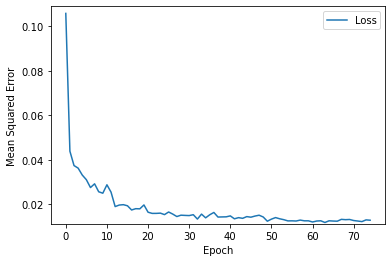


 Evaluate the new model against the test set:
4/4 [==============================] - 0s 501us/step - loss: 0.0169 - mean_squared_error: 0.0169


[0.016936693340539932, 0.01693669520318508]

In [21]:
# The following variables are the hyperparameters.
learning_rate = 0.005
epochs = 75
batch_size = 35

# Specify the label
label_name = "vote outcome"

# Establish the model's topography.
my_model = create_model(learning_rate, len(in_train))
# Train the model on the normalized training set. We're passing the entire
# normalized training set, but the model will only use the features
# defined by the feature_layer.
epochs, mse = train_model(my_model, in_train, epochs, 
                          label_name, batch_size)
my_model.summary()
plot_the_loss_curve(epochs, mse)

# After building a model against the training set, test that model
# against the test set.

print("\n Evaluate the new model against the test set:")
my_model.evaluate(x = in_test, y = out_test, batch_size=batch_size)

In [22]:
out_predict = my_model.predict(in_test)
out_comparison = out_test
out_comparison["pred"] = out_predict
print(out_comparison)

     volkja_proz      pred
485       0.6797  0.576013
434       0.3085  0.335630
187       0.5494  0.654745
512       0.5342  0.515510
576       0.7873  0.722978
..           ...       ...
461       0.3767  0.355117
237       0.6836  0.598141
528       0.3401  0.421276
209       0.4222  0.339457
322       0.4713  0.406629

[123 rows x 2 columns]


C:\Users\timsa\AppData\Local\Temp/ipykernel_3732/1093723621.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_comparison["pred"] = out_predict


Using mean squared error on the predicted values

In [23]:
res = 0
for real, pred in zip(out_comparison["volkja_proz"], out_comparison["pred"]):
    res += abs(real-pred)
res /= len(out_test)

print(f"The NN has an error of {res}")

The NN has an error of 0.10499242369837877


In [24]:
from sklearn import linear_model
from fracridge import FracRidgeRegressor, FracRidgeRegressorCV
from xgboost import XGBClassifier, XGBRegressor, plot_importance
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

part = parties
pred = part+fac+['legislatur']
df = pd.concat([df_features, df_outcomes], axis=1)
df['volkja_bin'] = df_outcomes_binary['volkja_proz']

in_train, in_test, out_train, out_test = train_test_split(df[pred], df['volkja_proz'], test_size=0.2)
in_train2, in_test2, out_train_binary, out_test_binary = train_test_split(df[pred], df['volkja_bin'], test_size=0.2)

scaler = StandardScaler().fit(in_train)
in_train_scaled = scaler.transform(in_train)
in_test_scaled = scaler.transform(in_test)

scaler2 = StandardScaler().fit(in_train2)
in_train_scaled2 = scaler2.transform(in_train2)
in_test_scaled2 = scaler2.transform(in_test2)

poly_feat = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit(in_train_scaled)
in_train_poly = poly_feat.transform(in_train_scaled)
in_test_poly = poly_feat.transform(in_test_scaled)

poly_feat2 = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit(in_train_scaled2)
in_train_poly2 = poly_feat2.transform(in_train_scaled2)
in_test_poly2 = poly_feat2.transform(in_test_scaled2)

dfsort=df
dfsort.sort_values(by=['legislatur'])

in_trainsort5, in_testsort5, out_trainsort5, out_testsort5 = train_test_split(dfsort[dfsort['legislatur']>5][pred], dfsort[dfsort['legislatur']>5]['volkja_proz'], test_size=0.2, shuffle=False)
in_trainsort25, in_testsort25, out_trainsort_binary5, out_testsort_binary5 = train_test_split(dfsort[dfsort['legislatur']>5][pred], dfsort[dfsort['legislatur']>5]['volkja_bin'], test_size=0.2, shuffle=False)

in_trainsort4, in_testsort4, out_trainsort4, out_testsort4 = train_test_split(dfsort[dfsort['legislatur']>4][pred], dfsort[dfsort['legislatur']>4]['volkja_proz'], test_size=0.2, shuffle=False)
in_trainsort24, in_testsort24, out_trainsort_binary4, out_testsort_binary4 = train_test_split(dfsort[dfsort['legislatur']>4][pred], dfsort[dfsort['legislatur']>4]['volkja_bin'], test_size=0.2, shuffle=False)

in_trainsort3, in_testsort3, out_trainsort3, out_testsort3 = train_test_split(dfsort[dfsort['legislatur']>3][pred], dfsort[dfsort['legislatur']>3]['volkja_proz'], test_size=0.2, shuffle=False)
in_trainsort23, in_testsort23, out_trainsort_binary3, out_testsort_binary3 = train_test_split(dfsort[dfsort['legislatur']>3][pred], dfsort[dfsort['legislatur']>3]['volkja_bin'], test_size=0.2, shuffle=False)

in_trainsort2, in_testsort2, out_trainsort2, out_testsort2 = train_test_split(dfsort[dfsort['legislatur']>2][pred], dfsort[dfsort['legislatur']>2]['volkja_proz'], test_size=0.2, shuffle=False)
in_trainsort22, in_testsort22, out_trainsort_binary2, out_testsort_binary2 = train_test_split(dfsort[dfsort['legislatur']>2][pred], dfsort[dfsort['legislatur']>2]['volkja_bin'], test_size=0.2, shuffle=False)

in_trainsort1, in_testsort1, out_trainsort1, out_testsort1 = train_test_split(dfsort[dfsort['legislatur']>1][pred], dfsort[dfsort['legislatur']>1]['volkja_proz'], test_size=0.2, shuffle=False)
in_trainsort21, in_testsort21, out_trainsort_binary1, out_testsort_binary1 = train_test_split(dfsort[dfsort['legislatur']>1][pred], dfsort[dfsort['legislatur']>1]['volkja_bin'], test_size=0.2, shuffle=False)

array([[<AxesSubplot:title={'center':'EDA'}>,
        <AxesSubplot:title={'center':'EDI'}>,
        <AxesSubplot:title={'center':'EJPD'}>,
        <AxesSubplot:title={'center':'VBS'}>],
       [<AxesSubplot:title={'center':'EFD'}>,
        <AxesSubplot:title={'center':'WBF'}>,
        <AxesSubplot:title={'center':'UVEK'}>,
        <AxesSubplot:title={'center':'BK'}>],
       [<AxesSubplot:title={'center':'p_fdp'}>,
        <AxesSubplot:title={'center':'p_svp'}>,
        <AxesSubplot:title={'center':'p_glp'}>,
        <AxesSubplot:title={'center':'p_sps'}>],
       [<AxesSubplot:title={'center':'br_pos'}>,
        <AxesSubplot:title={'center':'legislatur'}>,
        <AxesSubplot:title={'center':'volkja_proz'}>,
        <AxesSubplot:title={'center':'volkja_bin'}>]], dtype=object)

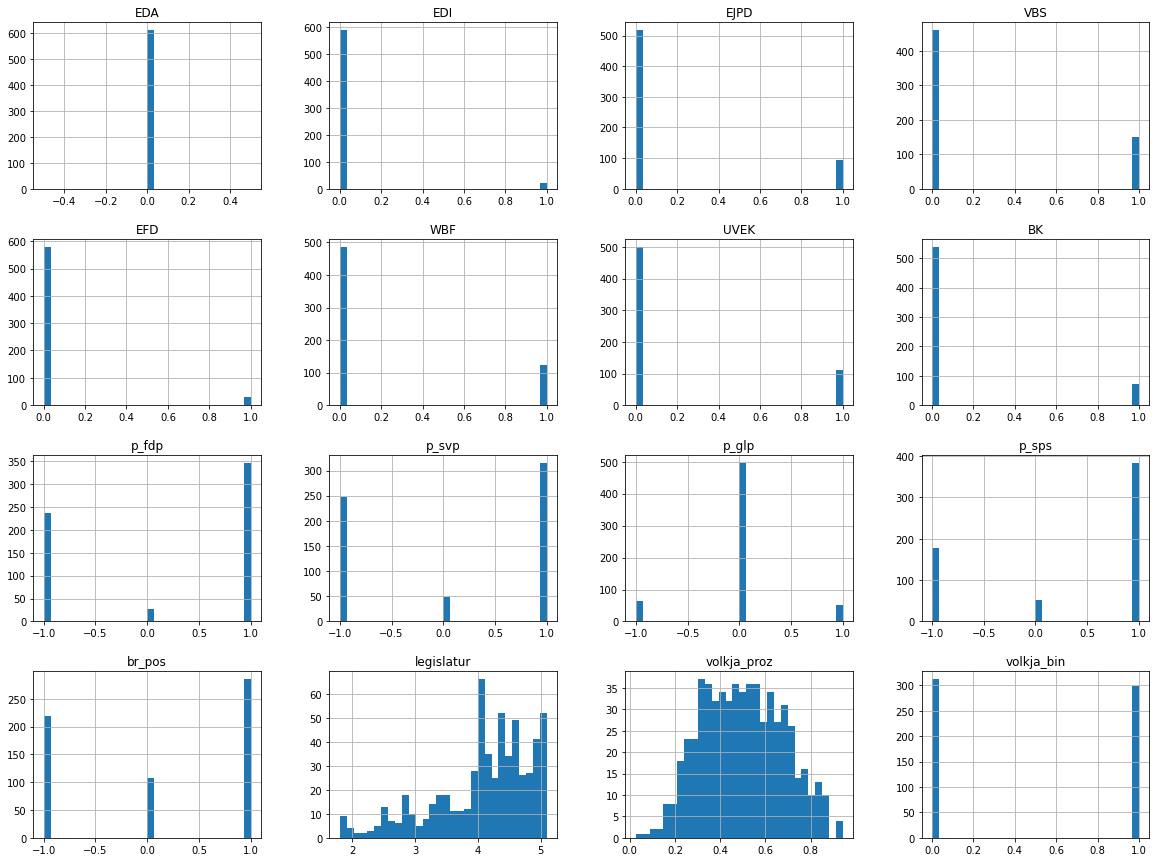

In [25]:
df.hist(bins=30,figsize=(20,15))

(array([ 3.,  6.,  0.,  4.,  2.,  0.,  2.,  3.,  0.,  5., 13.,  0.,  7.,
         6.,  0., 10.,  8.,  0., 10.,  5.,  0.,  8., 14.,  0., 18., 18.,
         0., 11., 11.,  0., 12., 28.,  0., 50., 16.,  0., 35., 25.,  0.,
        52., 34.,  0., 49., 26.,  0., 27., 41.,  0., 33., 19.]),
 array([1.8  , 1.866, 1.932, 1.998, 2.064, 2.13 , 2.196, 2.262, 2.328,
        2.394, 2.46 , 2.526, 2.592, 2.658, 2.724, 2.79 , 2.856, 2.922,
        2.988, 3.054, 3.12 , 3.186, 3.252, 3.318, 3.384, 3.45 , 3.516,
        3.582, 3.648, 3.714, 3.78 , 3.846, 3.912, 3.978, 4.044, 4.11 ,
        4.176, 4.242, 4.308, 4.374, 4.44 , 4.506, 4.572, 4.638, 4.704,
        4.77 , 4.836, 4.902, 4.968, 5.034, 5.1  ]),
 <BarContainer object of 50 artists>)

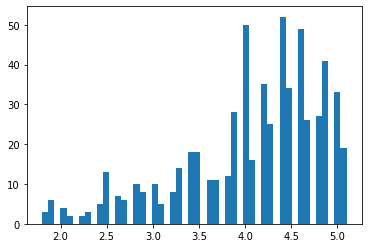

In [26]:
plt.hist(df['legislatur'], bins=50)

(array([ 1.,  0.,  1.,  0.,  2.,  2.,  2.,  5.,  6.,  3.,  8., 17., 10.,
        13., 16., 23., 22., 23., 17., 20., 18., 24., 20., 21., 19., 23.,
        18., 19., 25., 21., 14., 18., 20., 17., 19., 23., 15., 13., 13.,
         7., 13.,  6.,  5.,  6.,  9.,  6.,  4.,  0.,  2.,  2.]),
 array([0.0268  , 0.045118, 0.063436, 0.081754, 0.100072, 0.11839 ,
        0.136708, 0.155026, 0.173344, 0.191662, 0.20998 , 0.228298,
        0.246616, 0.264934, 0.283252, 0.30157 , 0.319888, 0.338206,
        0.356524, 0.374842, 0.39316 , 0.411478, 0.429796, 0.448114,
        0.466432, 0.48475 , 0.503068, 0.521386, 0.539704, 0.558022,
        0.57634 , 0.594658, 0.612976, 0.631294, 0.649612, 0.66793 ,
        0.686248, 0.704566, 0.722884, 0.741202, 0.75952 , 0.777838,
        0.796156, 0.814474, 0.832792, 0.85111 , 0.869428, 0.887746,
        0.906064, 0.924382, 0.9427  ]),
 <BarContainer object of 50 artists>)

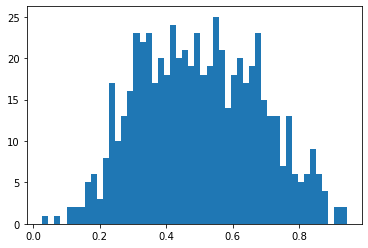

In [27]:
plt.hist(df['volkja_proz'], bins=50)

(array([312.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 299.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

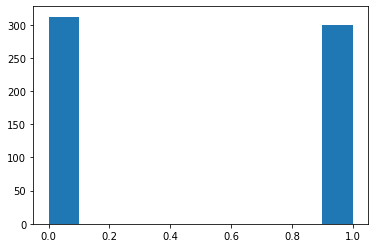

In [28]:
plt.hist(df['volkja_bin'])

<AxesSubplot:xlabel='legislatur', ylabel='volkja_proz'>

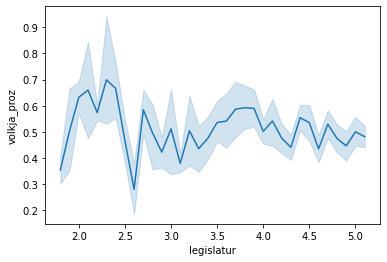

In [29]:
sns.lineplot(x=df['legislatur'], y=df['volkja_proz'])

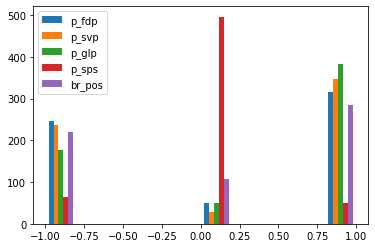

In [30]:
plt.hist([df['p_svp'], df['p_fdp'], df['p_sps'], df['p_glp'], df['br_pos'],])
plt.legend(part)

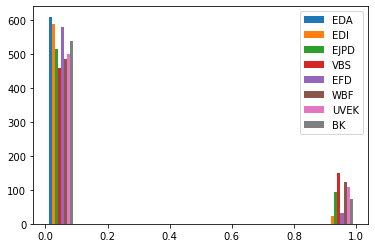

In [31]:
plt.hist([df['EDA'], df['EDI'], df['EJPD'], df['VBS'], df['EFD'],df['WBF'], df['UVEK'], df['BK'],])
plt.legend(fac)

In [32]:
#regression with binary input y
def reg(x_train, x_test, y_train, y_test):
    
    errors = []
    errors.append(['r2_score', r2_score])
    errors.append(['mse', mean_squared_error])
    errors.append(['mae', mean_absolute_error])
    
    y_pred = []
    reg = []
    
    ridge = linear_model.RidgeClassifier()
    ridge.fit(x_train,y_train)
    y_pred.append([ridge,'ridge', ridge.predict(x_test)])
    
    ridgecv = linear_model.RidgeClassifierCV()
    ridgecv.fit(x_train,y_train)
    y_pred.append([ridgecv,'ridgecv', ridgecv.predict(x_test)])
    
    #fracridge = FracRidgeRegressor()
    #fracridge.fit(x_train,y_train)
    #y_pred.append([fracridge,'fracridge', fracridge.predict(x_test)])
    
    #fracridgecv = FracRidgeRegressorCV()
    #fracridgecv.fit(x_train,y_train)
    #y_pred.append([fracridge,'fracridge', fracridge.predict(x_test)])
    
    sgd = linear_model.SGDClassifier(loss='log', penalty='elasticnet')
    sgd.fit(x_train, y_train)
    y_pred.append([sgd,'sgd', sgd.predict(x_test)])
    
    xgb = XGBClassifier()
    xgb.fit(x_train, y_train)
    y_pred.append([xgb,'xgb', xgb.predict(x_test)])
    
    for i in y_pred:
        print(i[1], ': ')
        for j in errors:
            print(j[0], j[1](i[2],y_test),' ')
        plot_confusion_matrix(i[0],x_test,y_test)
        print('\n')
    
    fig, ax = plt.subplots(len(y_pred),1, figsize=(20,30))
    axe = ax.ravel()
    for i in range(0,len(y_pred)):
        sns.regplot(ax=axe[i], x=y_pred[i][2], y=y_test, x_bins=100)
        axe[i].set_title(y_pred[i][1])
        axe[i].set_xlabel('recommendations')
        axe[i].set_ylabel('Passed')

D:\IDE\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:04:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ridge : 
r2_score 0.3159427966101698  
mse 0.17073170731707318  
mae 0.17073170731707318  


ridgecv : 
r2_score 0.3474801061007957  
mse 0.16260162601626016  
mae 0.16260162601626016  


sgd : 
r2_score 0.0013997760358342992  
mse 0.23577235772357724  
mae 0.23577235772357724  


xgb : 
r2_score 0.009166666666666656  
mse 0.23577235772357724  
mae 0.23577235772357724  




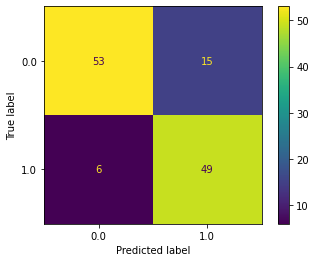

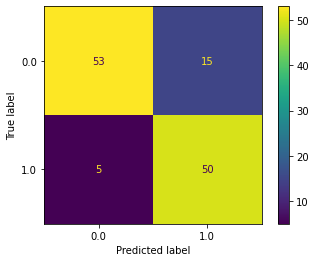

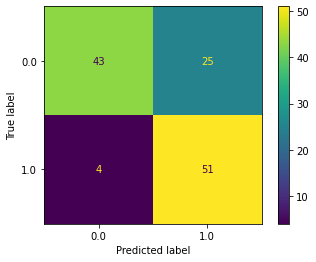

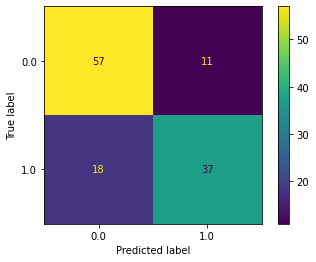

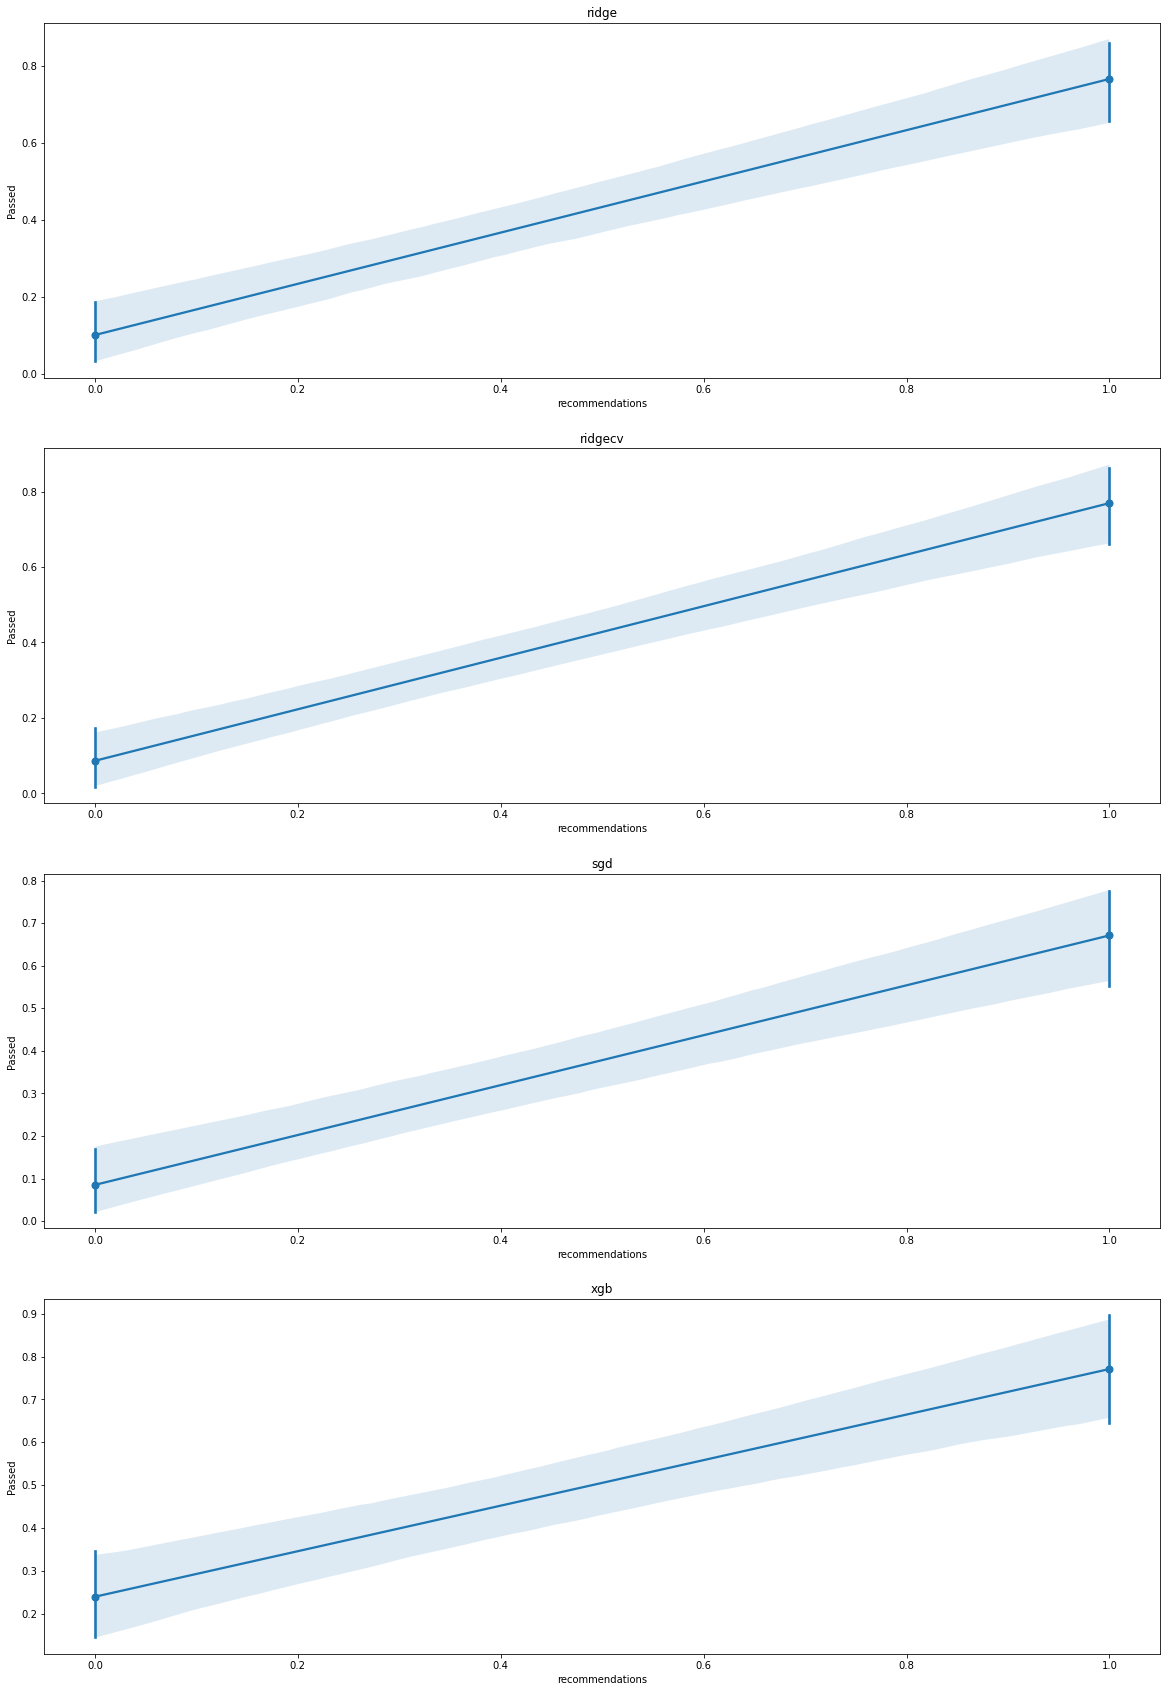

In [33]:
reg(in_train2, in_test2, out_train_binary, out_test_binary)

In [34]:
#ols
def ols(x_train, x_test, y_train, y_test):
    
    errors = []
    errors.append(['r2_score', r2_score])
    errors.append(['mse', mean_squared_error])
    errors.append(['mae', mean_absolute_error])
    
    y_pred = []
    
    ridge = linear_model.Ridge()
    ridge.fit(x_train,y_train)
    y_pred.append(['ridge', ridge.predict(x_test)])
    
    ridgecv = linear_model.RidgeCV()
    ridgecv.fit(x_train,y_train)
    y_pred.append(['ridgecv', ridgecv.predict(x_test)])
    
    lasso = linear_model.Lasso()
    lasso.fit(x_train,y_train)
    y_pred.append(['lasso', lasso.predict(x_test)])
    
    lassocv = linear_model.LassoCV()
    lassocv.fit(x_train,y_train)
    y_pred.append(['lassocv', lassocv.predict(x_test)])
    
    elasticnet = linear_model.ElasticNet()
    elasticnet.fit(x_train,y_train)
    y_pred.append(['elasticnet', elasticnet.predict(x_test)])
    
    elasticnetcv = linear_model.ElasticNetCV()
    elasticnetcv.fit(x_train,y_train)
    y_pred.append(['elasticnetcv', elasticnetcv.predict(x_test)])
    
    xgb = XGBRegressor()
    xgb.fit(x_train,y_train)
    y_pred.append(['xgb', xgb.predict(x_test)])
    
    for i in y_pred:
        print(i[0], ': ')
        for j in errors:
            print(j[0], j[1](i[1],y_test),' ')
        print('\n')
    
    fig, ax = plt.subplots(len(y_pred),1, figsize=(20,30))
    axe = ax.ravel()
    for i in range(0,len(y_pred)):
        sns.regplot(ax=axe[i], x=y_pred[i][1], y=y_test, x_bins=100)
        axe[i].set_title(y_pred[i][0])
        axe[i].set_xlabel('recommendations')
        axe[i].set_ylabel('Passed')
        
    plot_importance(xgb)

ridge : 
r2_score 0.2731170428893077  
mse 0.012742660897641726  
mae 0.08862903798819517  


ridgecv : 
r2_score 0.24901482732108093  
mse 0.012730267275001587  
mae 0.08854497499153177  


lasso : 
r2_score -5.6203315119576066e+29  
mse 0.027710373776031597  
mae 0.14192171964547515  


lassocv : 
r2_score 0.22342813629459857  
mse 0.012886630459815968  
mae 0.08891781170993057  


elasticnet : 
r2_score -5.6203315119576066e+29  
mse 0.027710373776031597  
mae 0.14192171964547515  


elasticnetcv : 
r2_score 0.22172772740088753  
mse 0.012888040863266052  
mae 0.08892106807151968  


xgb : 
r2_score 0.18087844951910392  
mse 0.019605363802345118  
mae 0.10805945753799222  




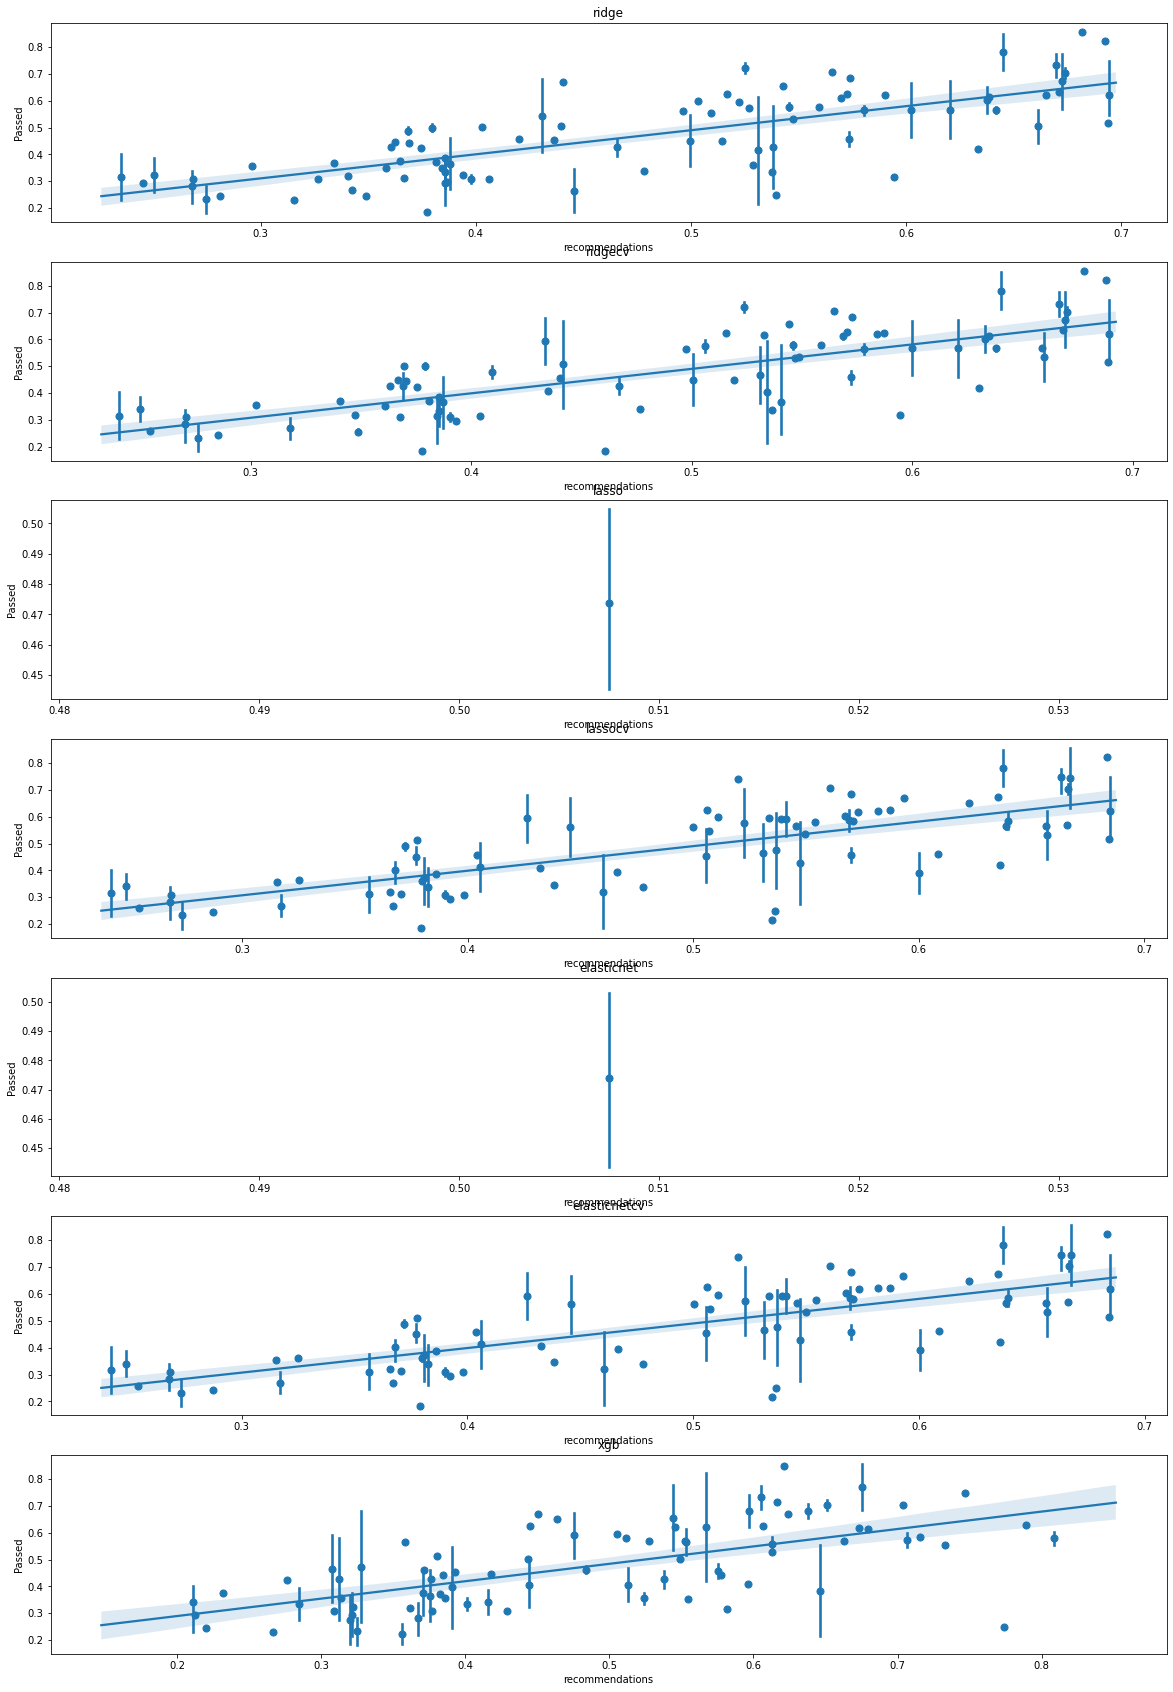

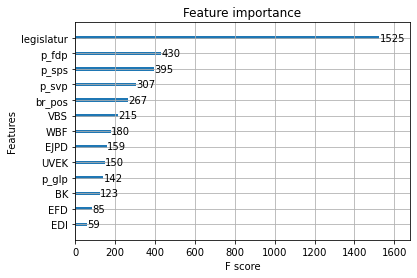

In [35]:
ols(in_train, in_test, out_train, out_test)

D:\IDE\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:04:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ridge : 
r2_score 0.016271373414230683  
mse 0.23577235772357724  
mae 0.23577235772357724  


ridgecv : 
r2_score -0.06746920492721142  
mse 0.25203252032520324  
mae 0.25203252032520324  


sgd : 
r2_score -0.6567346938775507  
mse 0.2682926829268293  
mae 0.2682926829268293  


xgb : 
r2_score -0.40291777188328926  
mse 0.34959349593495936  
mae 0.34959349593495936  




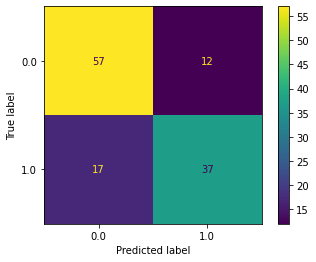

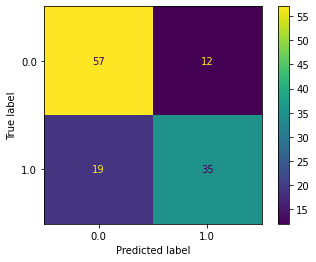

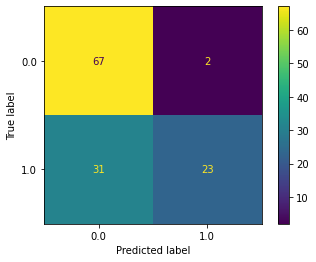

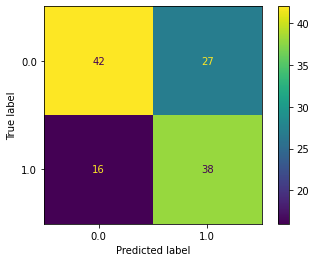

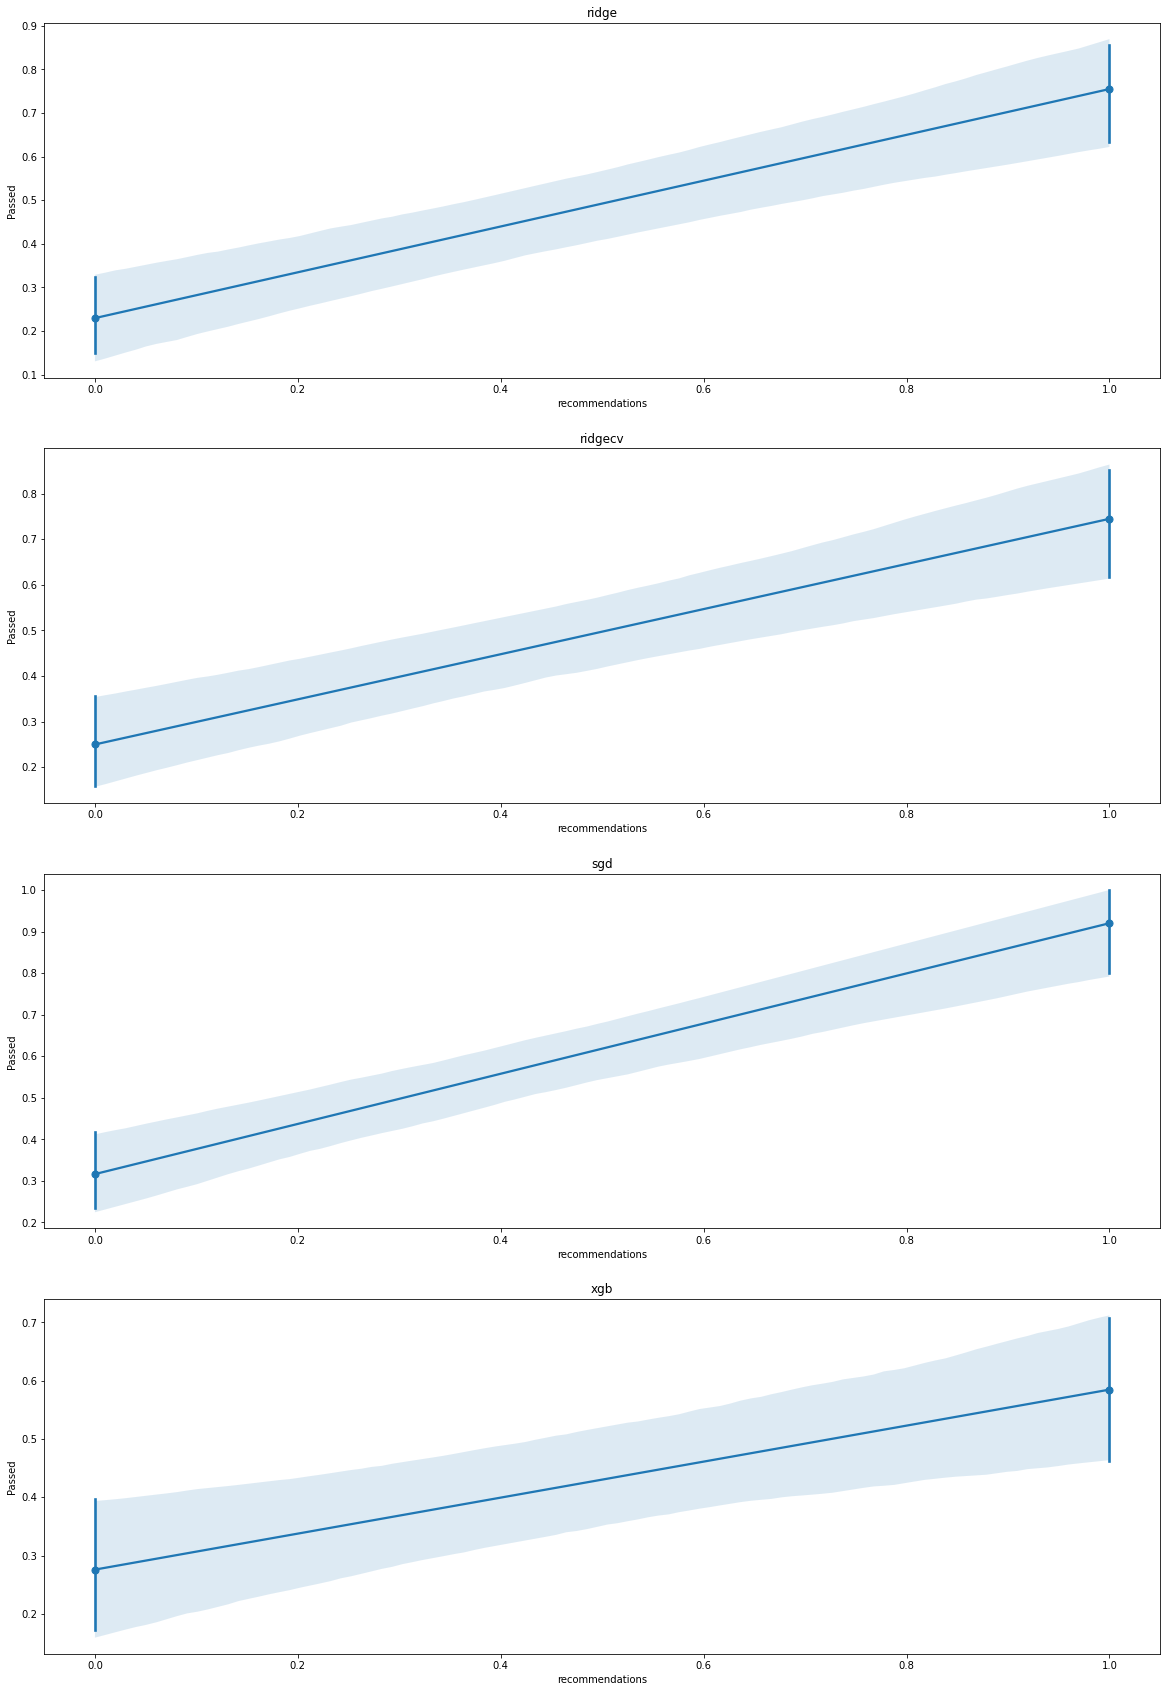

In [36]:
reg(in_trainsort21, in_testsort21, out_trainsort_binary1, out_testsort_binary1)

D:\IDE\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:04:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ridge : 
r2_score 0.0277777777777779  
mse 0.23333333333333334  
mae 0.23333333333333334  


ridgecv : 
r2_score 0.0277777777777779  
mse 0.23333333333333334  
mae 0.23333333333333334  


sgd : 
r2_score -1.4223602484472049  
mse 0.43333333333333335  
mae 0.43333333333333335  


xgb : 
r2_score -0.3714285714285712  
mse 0.3333333333333333  
mae 0.3333333333333333  




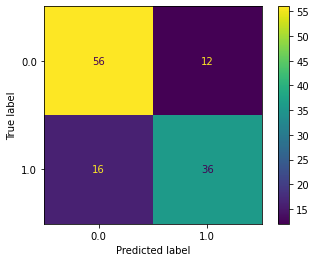

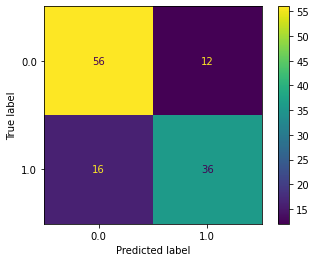

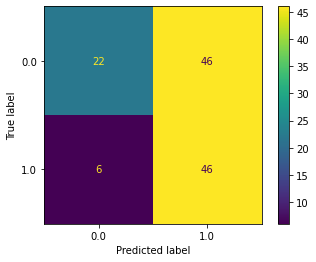

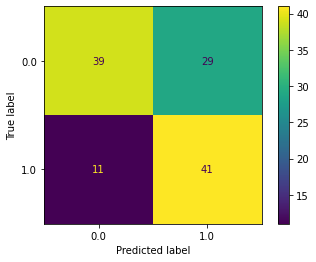

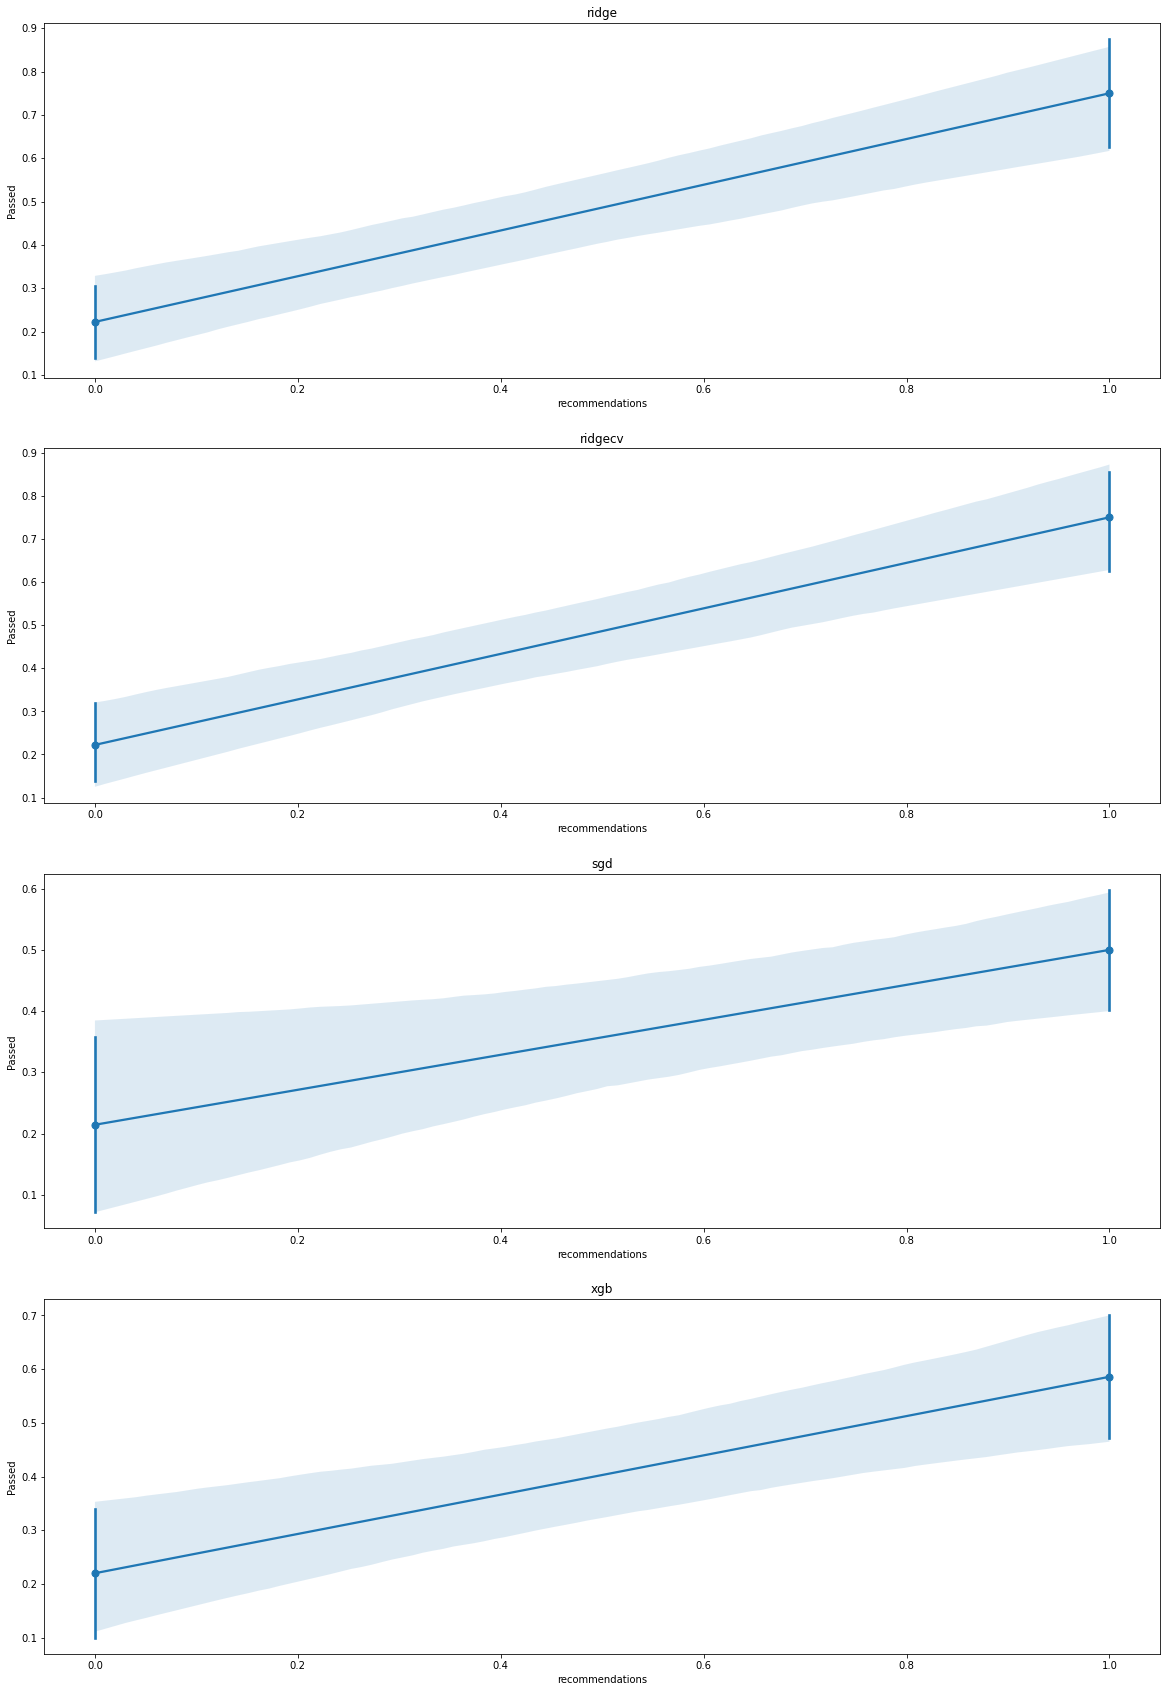

In [37]:
reg(in_trainsort22, in_testsort22, out_trainsort_binary2, out_testsort_binary2)

D:\IDE\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:04:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ridge : 
r2_score 0.12164179104477602  
mse 0.205607476635514  
mae 0.205607476635514  


ridgecv : 
r2_score 0.0905395417590541  
mse 0.21495327102803738  
mae 0.21495327102803738  


sgd : 
r2_score 0.008553100498930877  
mse 0.24299065420560748  
mae 0.24299065420560748  


xgb : 
r2_score -0.4772388059701489  
mse 0.34579439252336447  
mae 0.34579439252336447  




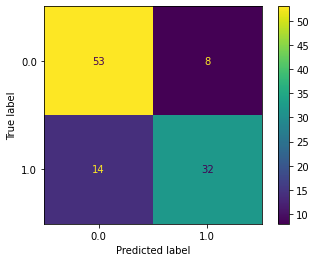

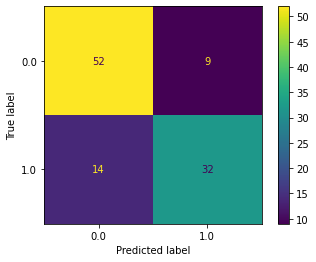

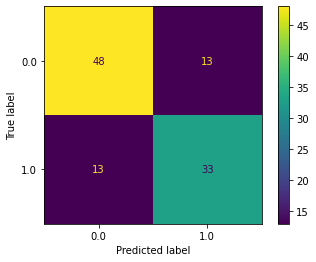

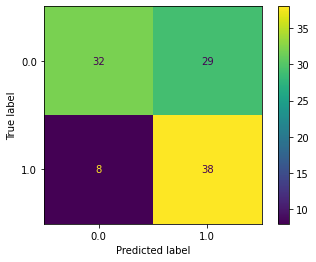

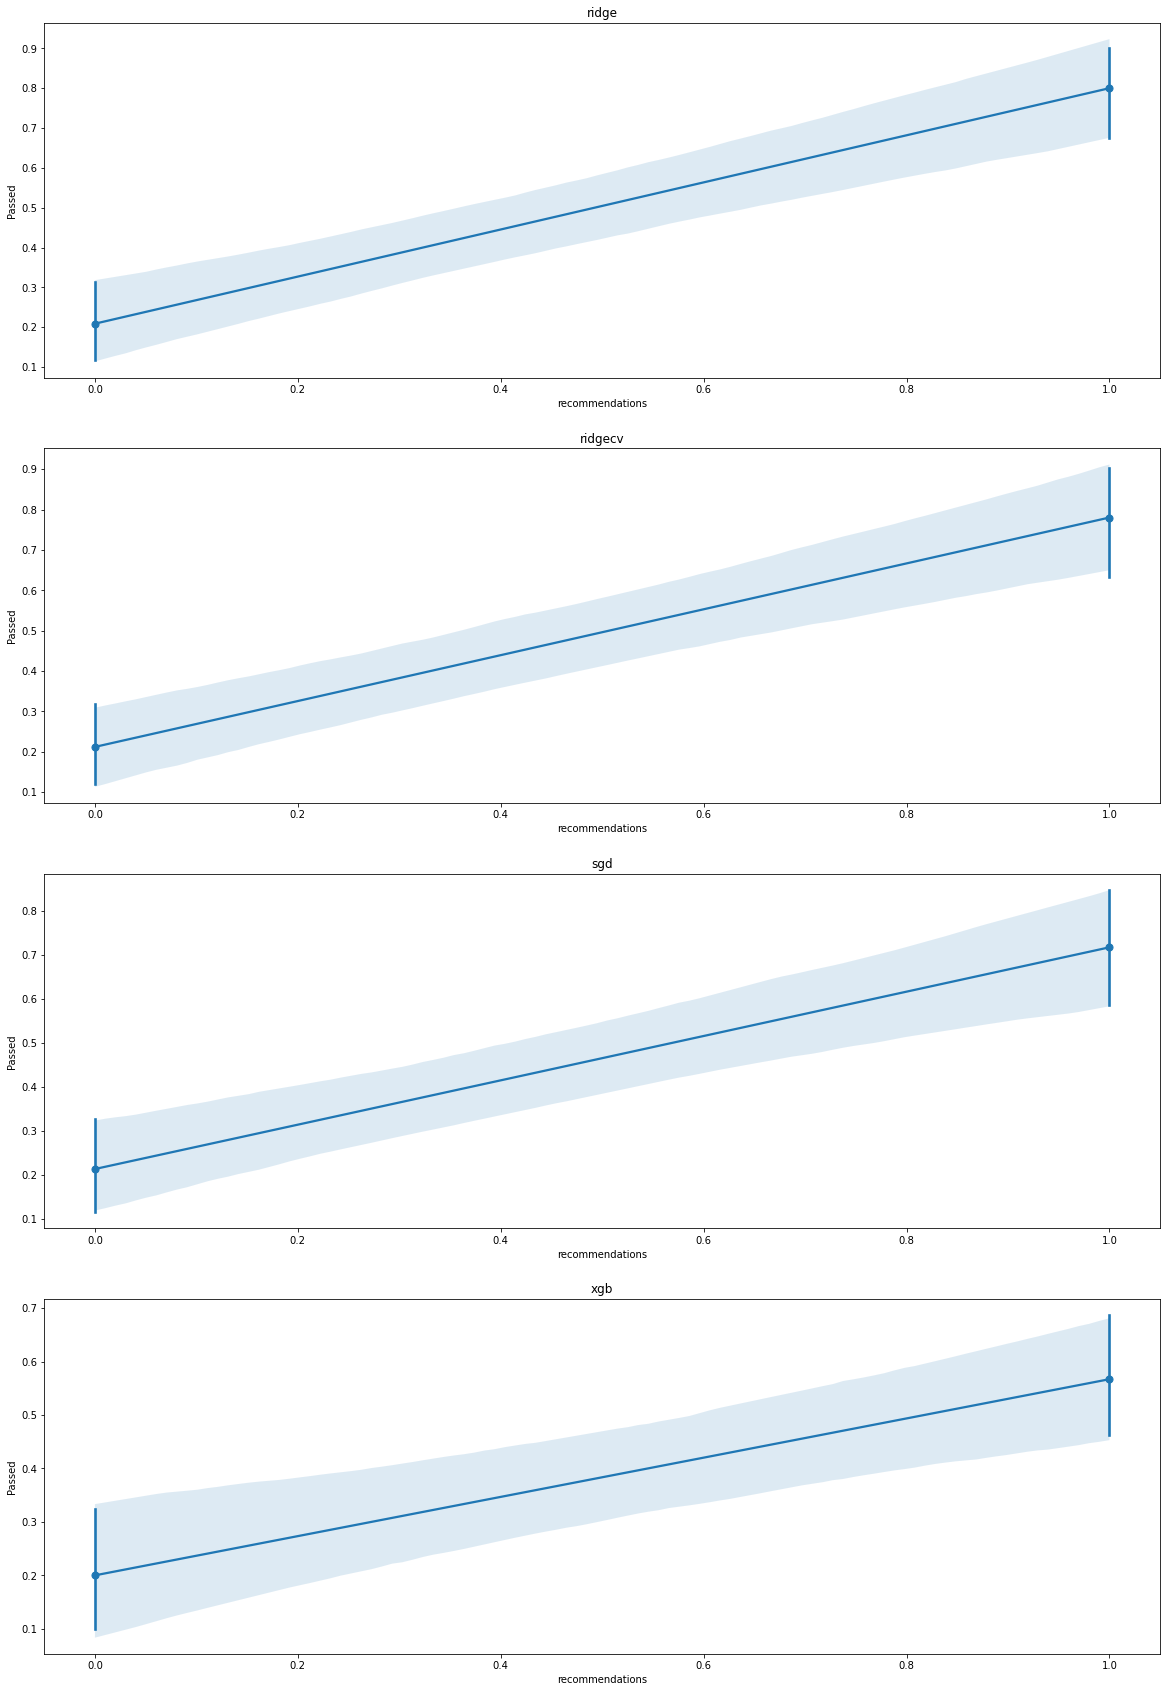

In [38]:
reg(in_trainsort23, in_testsort23, out_trainsort_binary3, out_testsort_binary3)

D:\IDE\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:04:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ridge : 
r2_score 0.27554179566563475  
mse 0.18055555555555555  
mae 0.18055555555555555  


ridgecv : 
r2_score 0.27554179566563475  
mse 0.18055555555555555  
mae 0.18055555555555555  


sgd : 
r2_score -0.6847290640394088  
mse 0.2638888888888889  
mae 0.2638888888888889  


xgb : 
r2_score -0.039294306335204476  
mse 0.25  
mae 0.25  




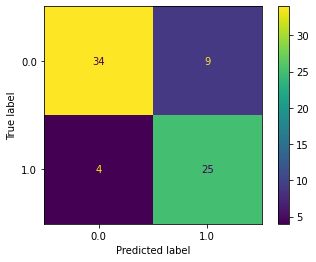

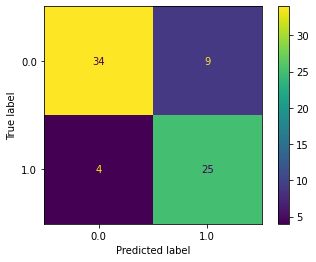

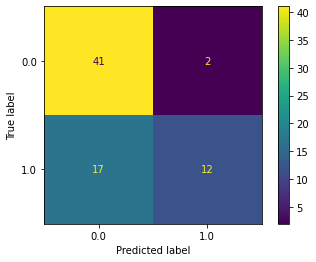

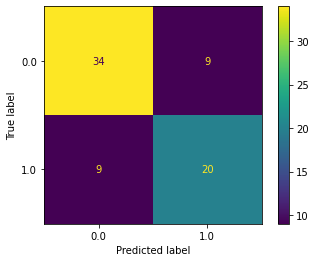

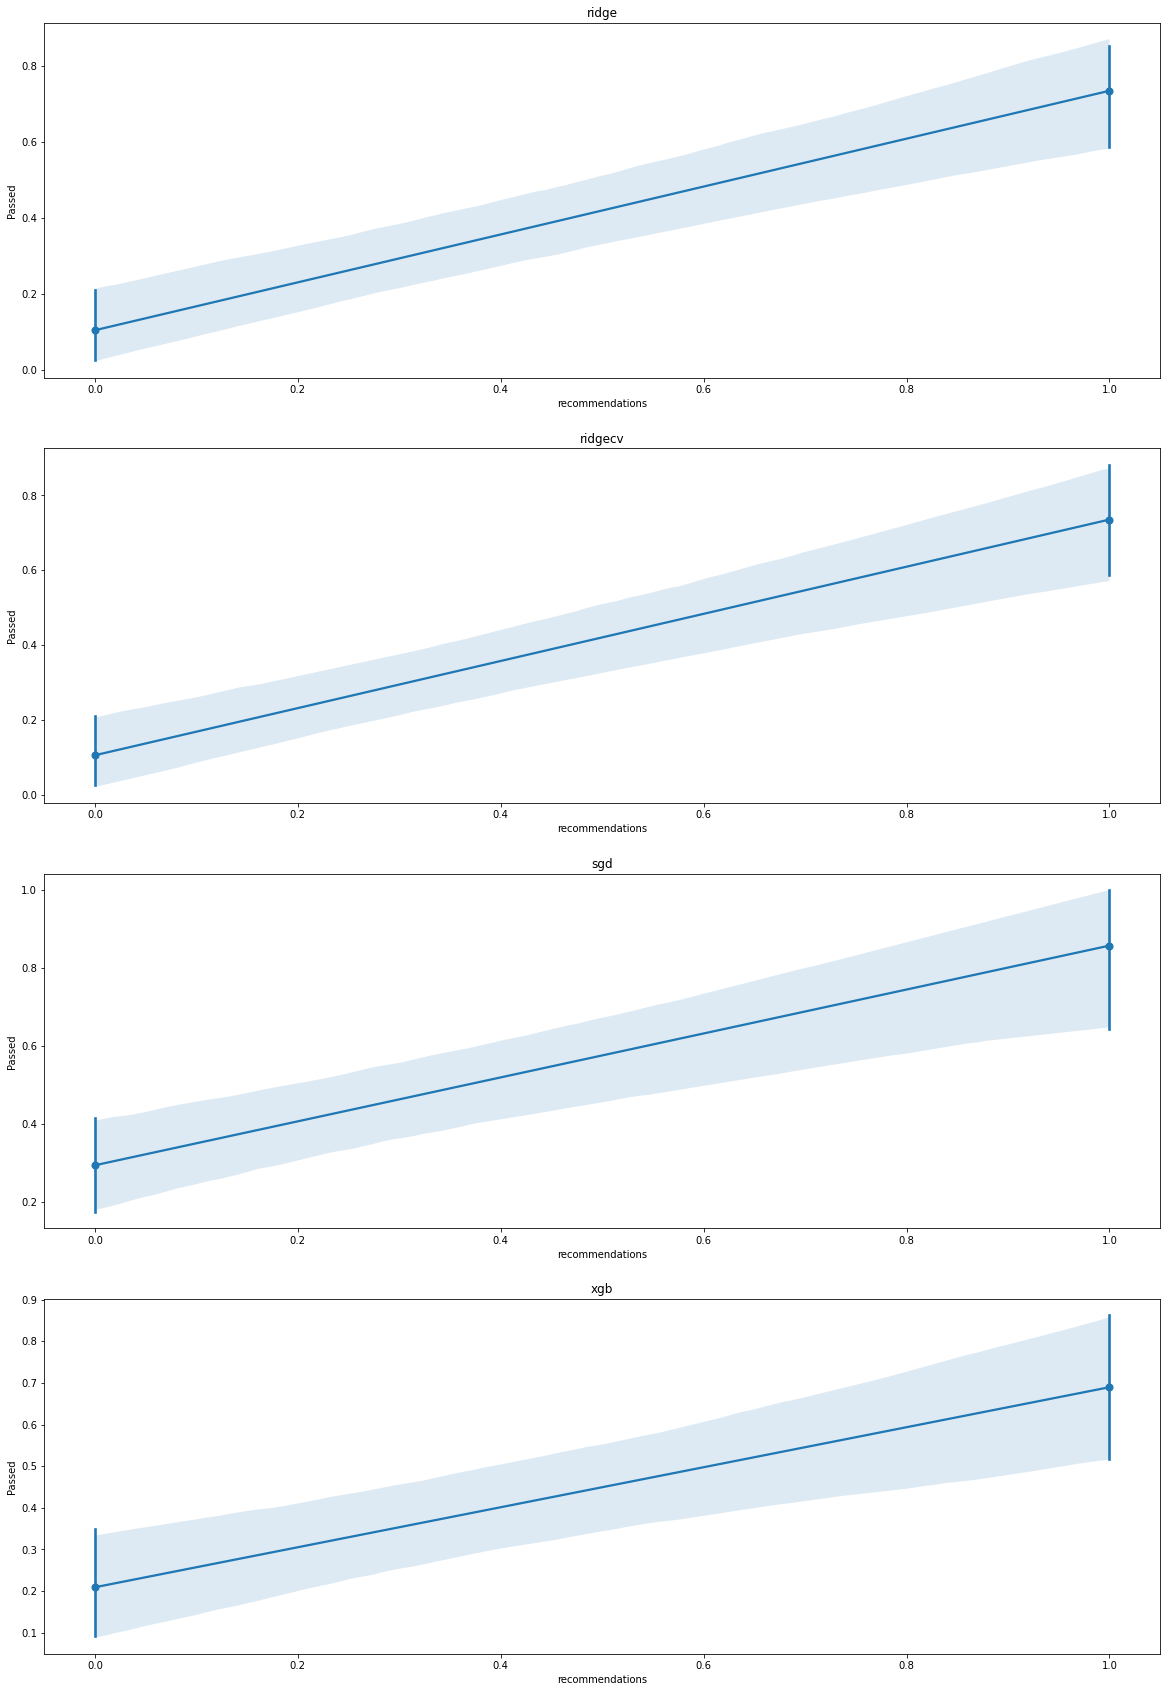

In [39]:
reg(in_trainsort24, in_testsort24, out_trainsort_binary4, out_testsort_binary4)

D:\IDE\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:04:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ridge : 
r2_score -1.0  
mse 0.5  
mae 0.5  


ridgecv : 
r2_score -1.0  
mse 0.5  
mae 0.5  


sgd : 
r2_score -0.33333333333333326  
mse 0.25  
mae 0.25  


xgb : 
r2_score -1.0  
mse 0.5  
mae 0.5  




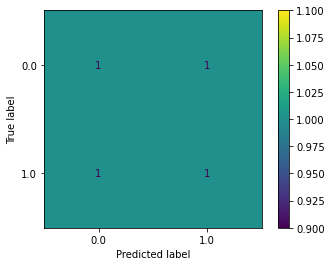

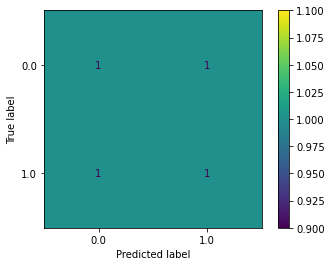

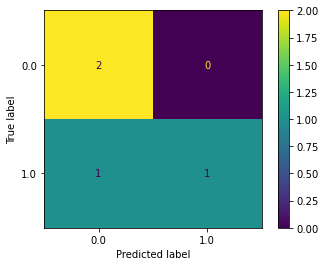

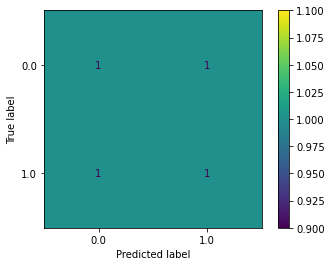

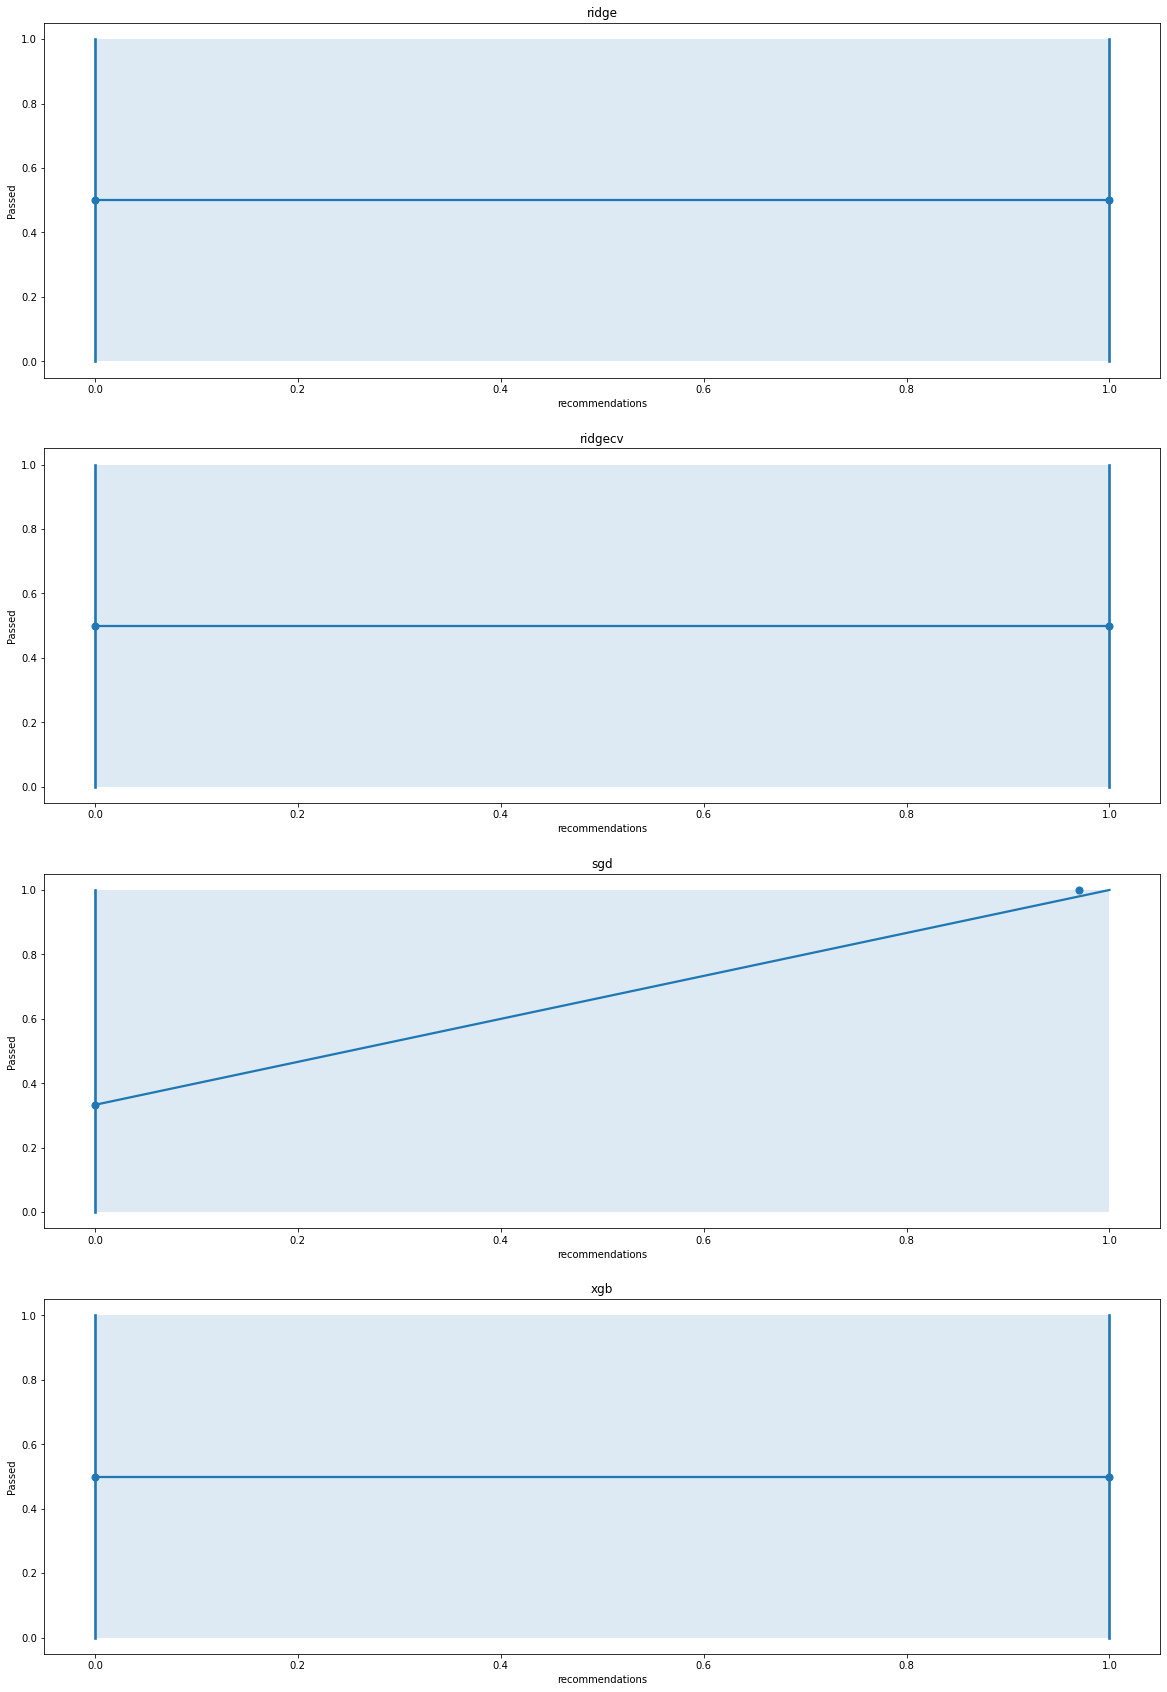

In [40]:
reg(in_trainsort25, in_testsort25, out_trainsort_binary5, out_testsort_binary5)

ridge : 
r2_score -0.8995101216791543  
mse 0.016972335484142065  
mae 0.10329216003488896  


ridgecv : 
r2_score -0.9156513271531428  
mse 0.01665455733219533  
mae 0.10265307465372463  


lasso : 
r2_score -5.52518990524649e+29  
mse 0.02724128943856714  
mae 0.13810674896707983  


lassocv : 
r2_score -1.1745030030134282  
mse 0.017588474270550006  
mae 0.10619109895949094  


elasticnet : 
r2_score -5.52518990524649e+29  
mse 0.02724128943856714  
mae 0.13810674896707983  


elasticnetcv : 
r2_score -1.1872978420291895  
mse 0.017592007401171828  
mae 0.10623170218338575  


xgb : 
r2_score -1.183786248080518  
mse 0.026334014224180916  
mae 0.13168761177314975  




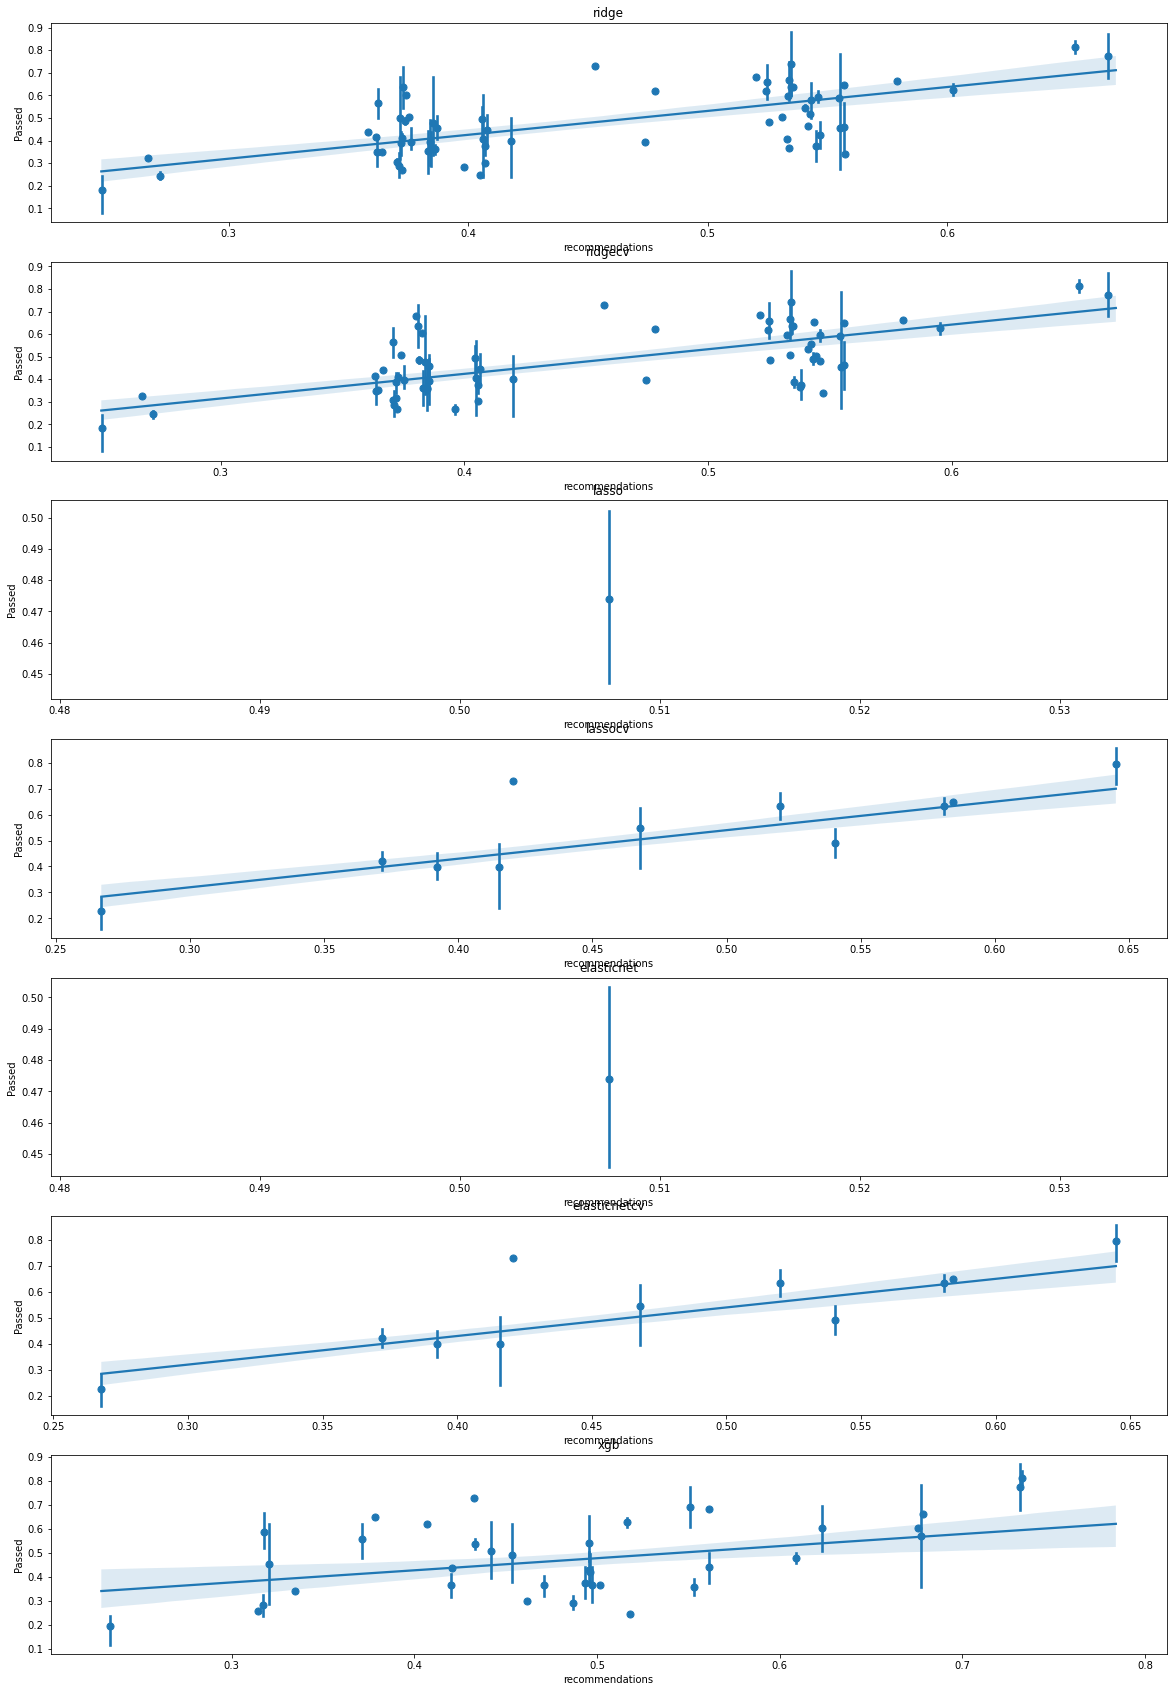

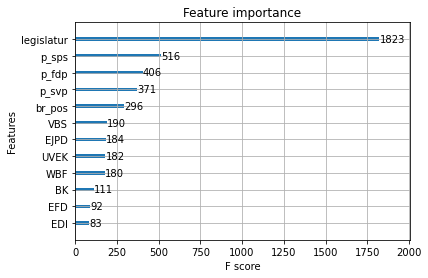

In [41]:
ols(in_trainsort1, in_testsort1, out_trainsort1, out_testsort1)

ridge : 
r2_score -0.8172748808514663  
mse 0.015900384600638143  
mae 0.10036736728027527  


ridgecv : 
r2_score -0.8318456385373032  
mse 0.01569958843785215  
mae 0.099886745060708  


lasso : 
r2_score 0.0  
mse 0.02721716359066426  
mae 0.13760717573221756  


lassocv : 
r2_score -1.0219920249949639  
mse 0.016650589636829773  
mae 0.10338057968602017  


elasticnet : 
r2_score 0.0  
mse 0.02721716359066426  
mae 0.13760717573221756  


elasticnetcv : 
r2_score -1.0150437083288315  
mse 0.016618566235970775  
mae 0.10325830264902752  


xgb : 
r2_score -0.8203833262793059  
mse 0.02181687157443315  
mae 0.12180169411679108  




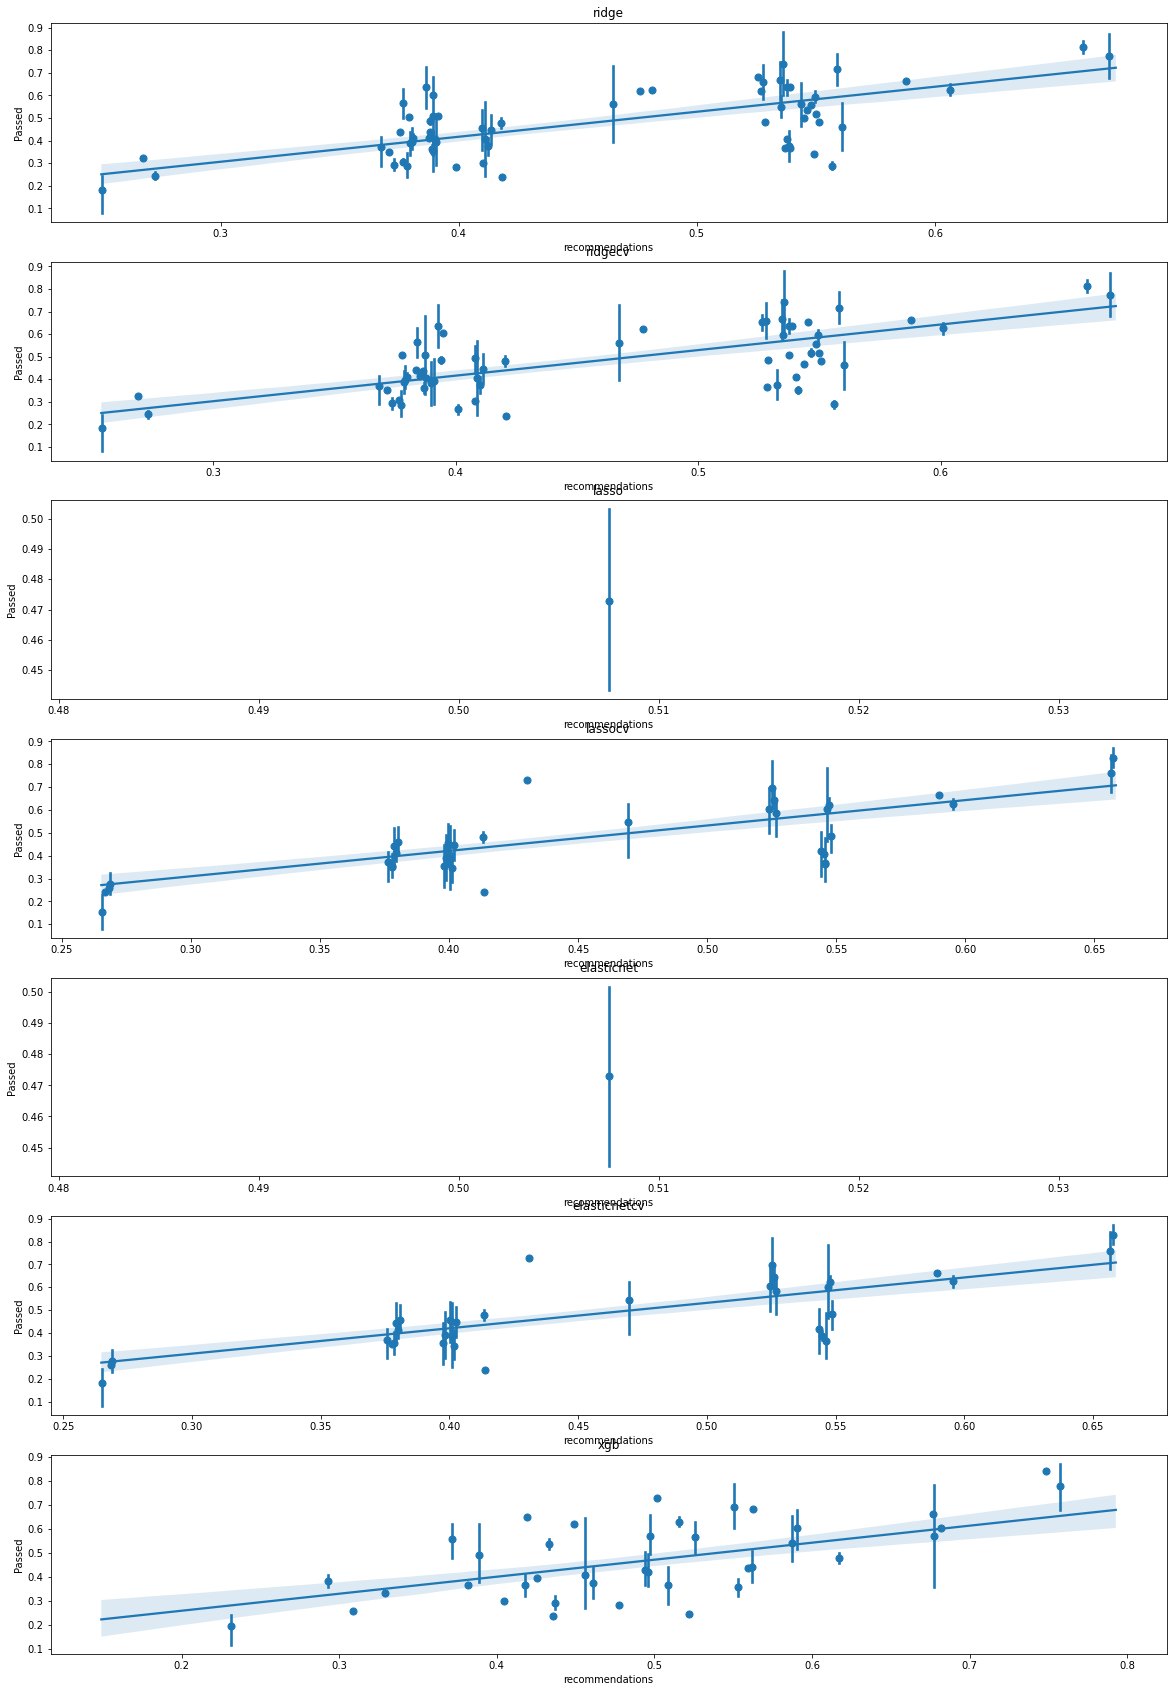

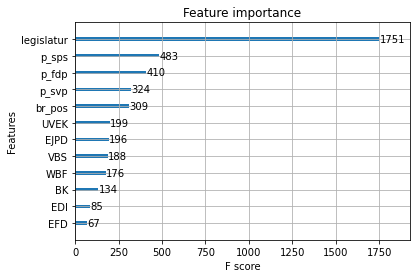

In [42]:
ols(in_trainsort2, in_testsort2, out_trainsort2, out_testsort2)

ridge : 
r2_score 0.17425436242292436  
mse 0.013704246207584399  
mae 0.08976206010320854  


ridgecv : 
r2_score -0.08797011152817236  
mse 0.013307071143311805  
mae 0.08923082666018163  


lasso : 
r2_score -2.257949072915364e+30  
mse 0.027831371087546224  
mae 0.1389157954920286  


lassocv : 
r2_score -0.9147454135712352  
mse 0.015644367521612513  
mae 0.09920028764954944  


elasticnet : 
r2_score -2.257949072915364e+30  
mse 0.027831371087546224  
mae 0.1389157954920286  


elasticnetcv : 
r2_score -0.9017982479577813  
mse 0.015573181982688077  
mae 0.09890887056565091  


xgb : 
r2_score -0.05614720714895283  
mse 0.01445600893100619  
mae 0.09806265079507204  




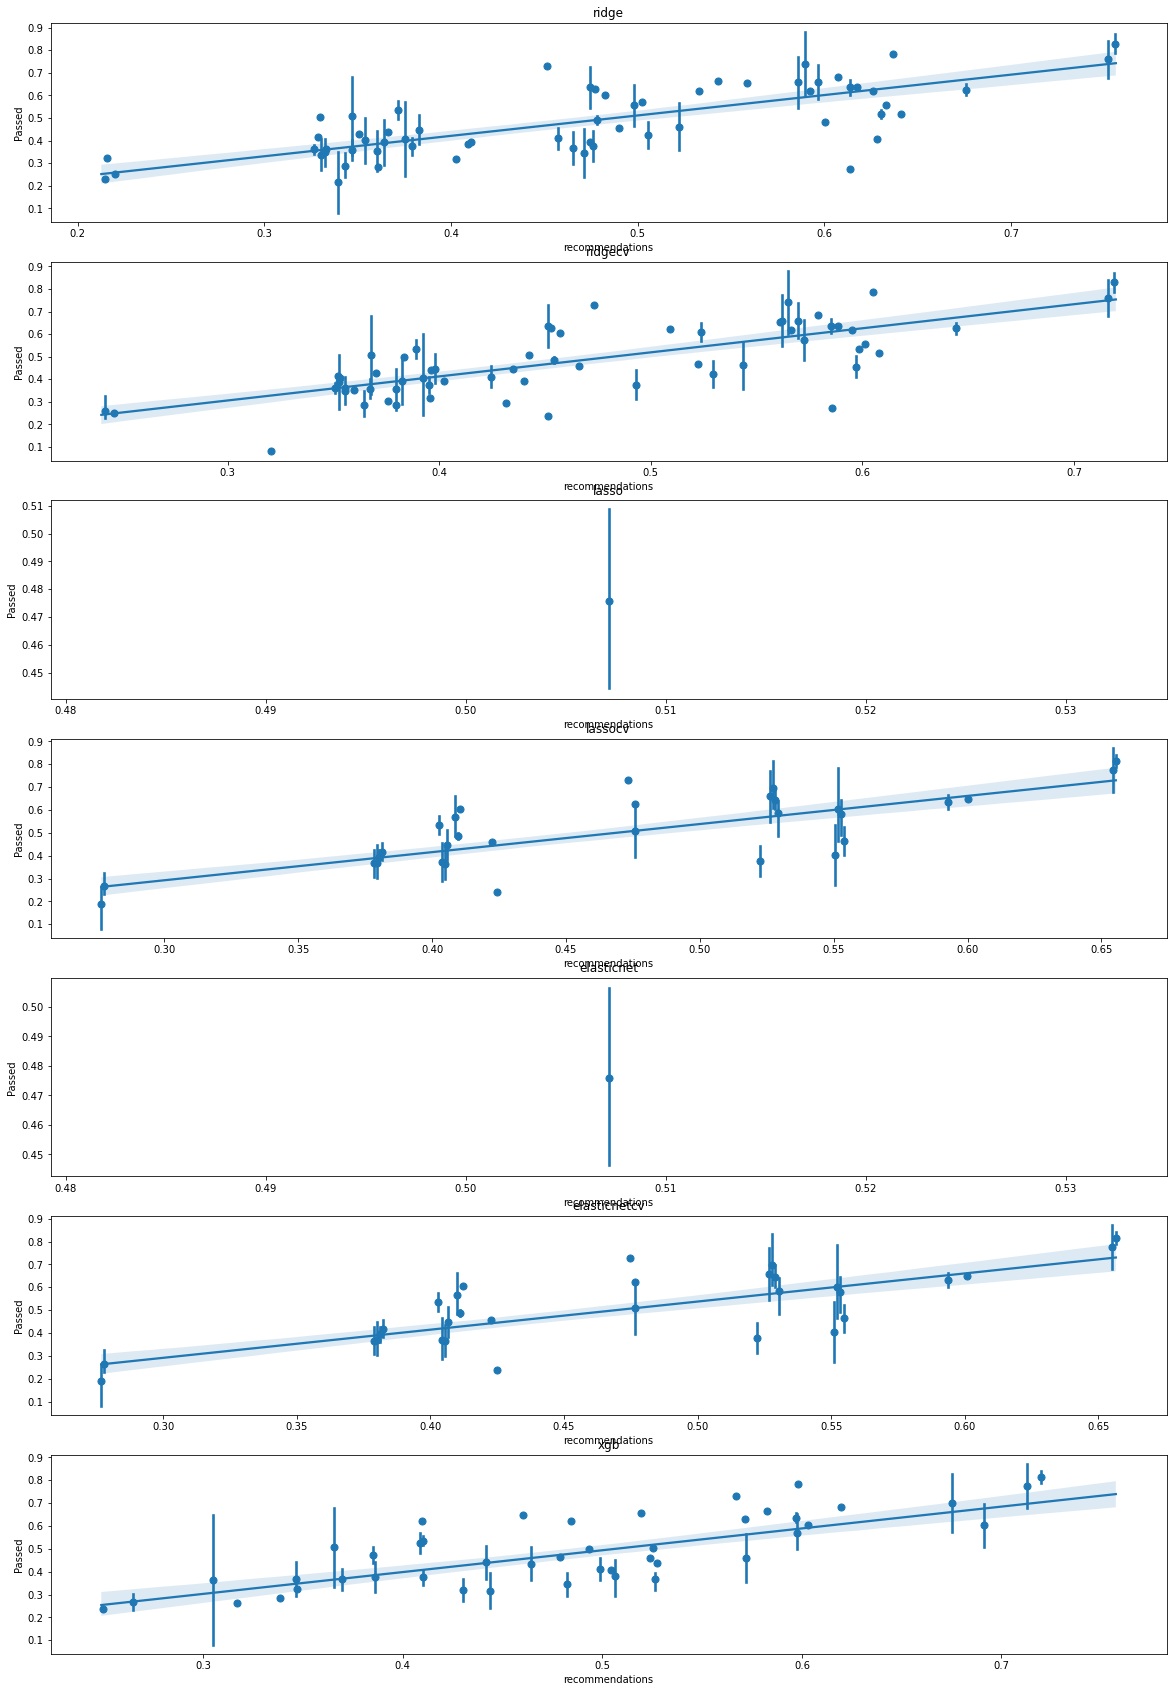

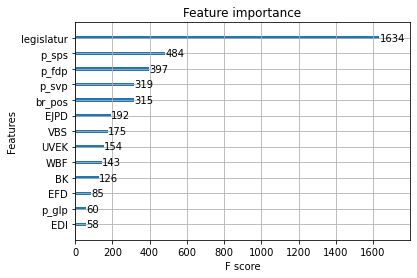

In [43]:
ols(in_trainsort3, in_testsort3, out_trainsort3, out_testsort3)

ridge : 
r2_score 0.4204425992863502  
mse 0.009228971215362758  
mae 0.07302658363912094  


ridgecv : 
r2_score 0.35863139294698565  
mse 0.009098712896463522  
mae 0.07313062600557789  


lasso : 
r2_score 0.0  
mse 0.026375958081517388  
mae 0.13448323099415205  


lassocv : 
r2_score -0.044126598029715636  
mse 0.010936694409964788  
mae 0.08327141310426492  


elasticnet : 
r2_score 0.0  
mse 0.026375958081517388  
mae 0.13448323099415205  


elasticnetcv : 
r2_score -0.05234036774906459  
mse 0.010952995071298882  
mae 0.08326962013137715  


xgb : 
r2_score 0.19216768526186967  
mse 0.021097398213658573  
mae 0.11399909354647002  




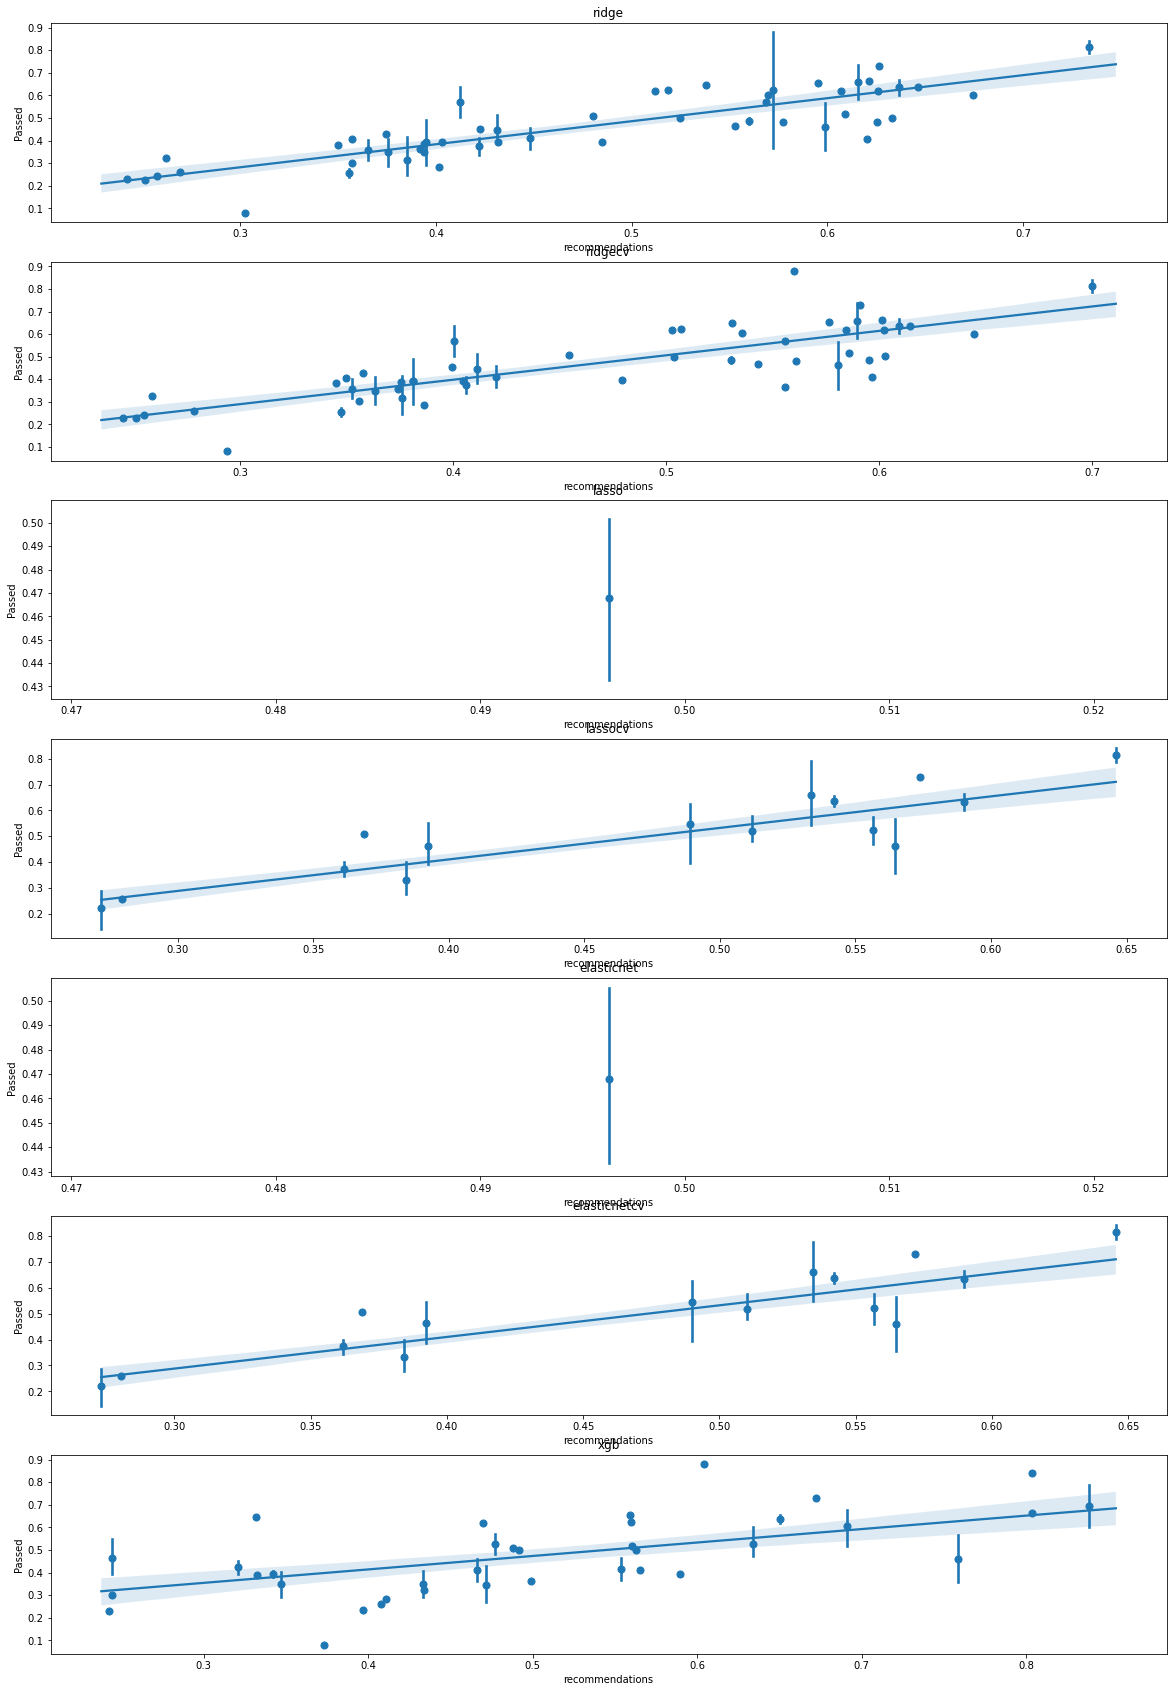

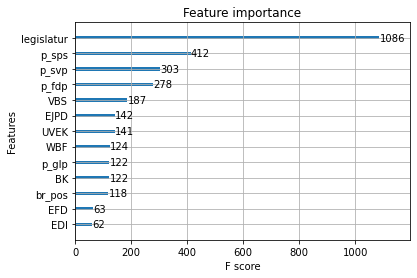

In [44]:
ols(in_trainsort4, in_testsort4, out_trainsort4, out_testsort4)

ridge : 
r2_score -0.1745225628875633  
mse 0.006844219513538174  
mae 0.07957278922576629  


ridgecv : 
r2_score -2.2988434064835075  
mse 0.007871916649581182  
mae 0.0869072911169741  


lasso : 
r2_score 0.0  
mse 0.012905872544444436  
mae 0.0981383333333333  


lassocv : 
r2_score -9.278531944594098  
mse 0.01016270948478102  
mae 0.0911818743983024  


elasticnet : 
r2_score 0.0  
mse 0.012905872544444436  
mae 0.0981383333333333  


elasticnetcv : 
r2_score -9.78694024397614  
mse 0.010176629148976447  
mae 0.09111815861668274  


xgb : 
r2_score -0.2088672223353285  
mse 0.01599314958995207  
mae 0.10473380601406096  




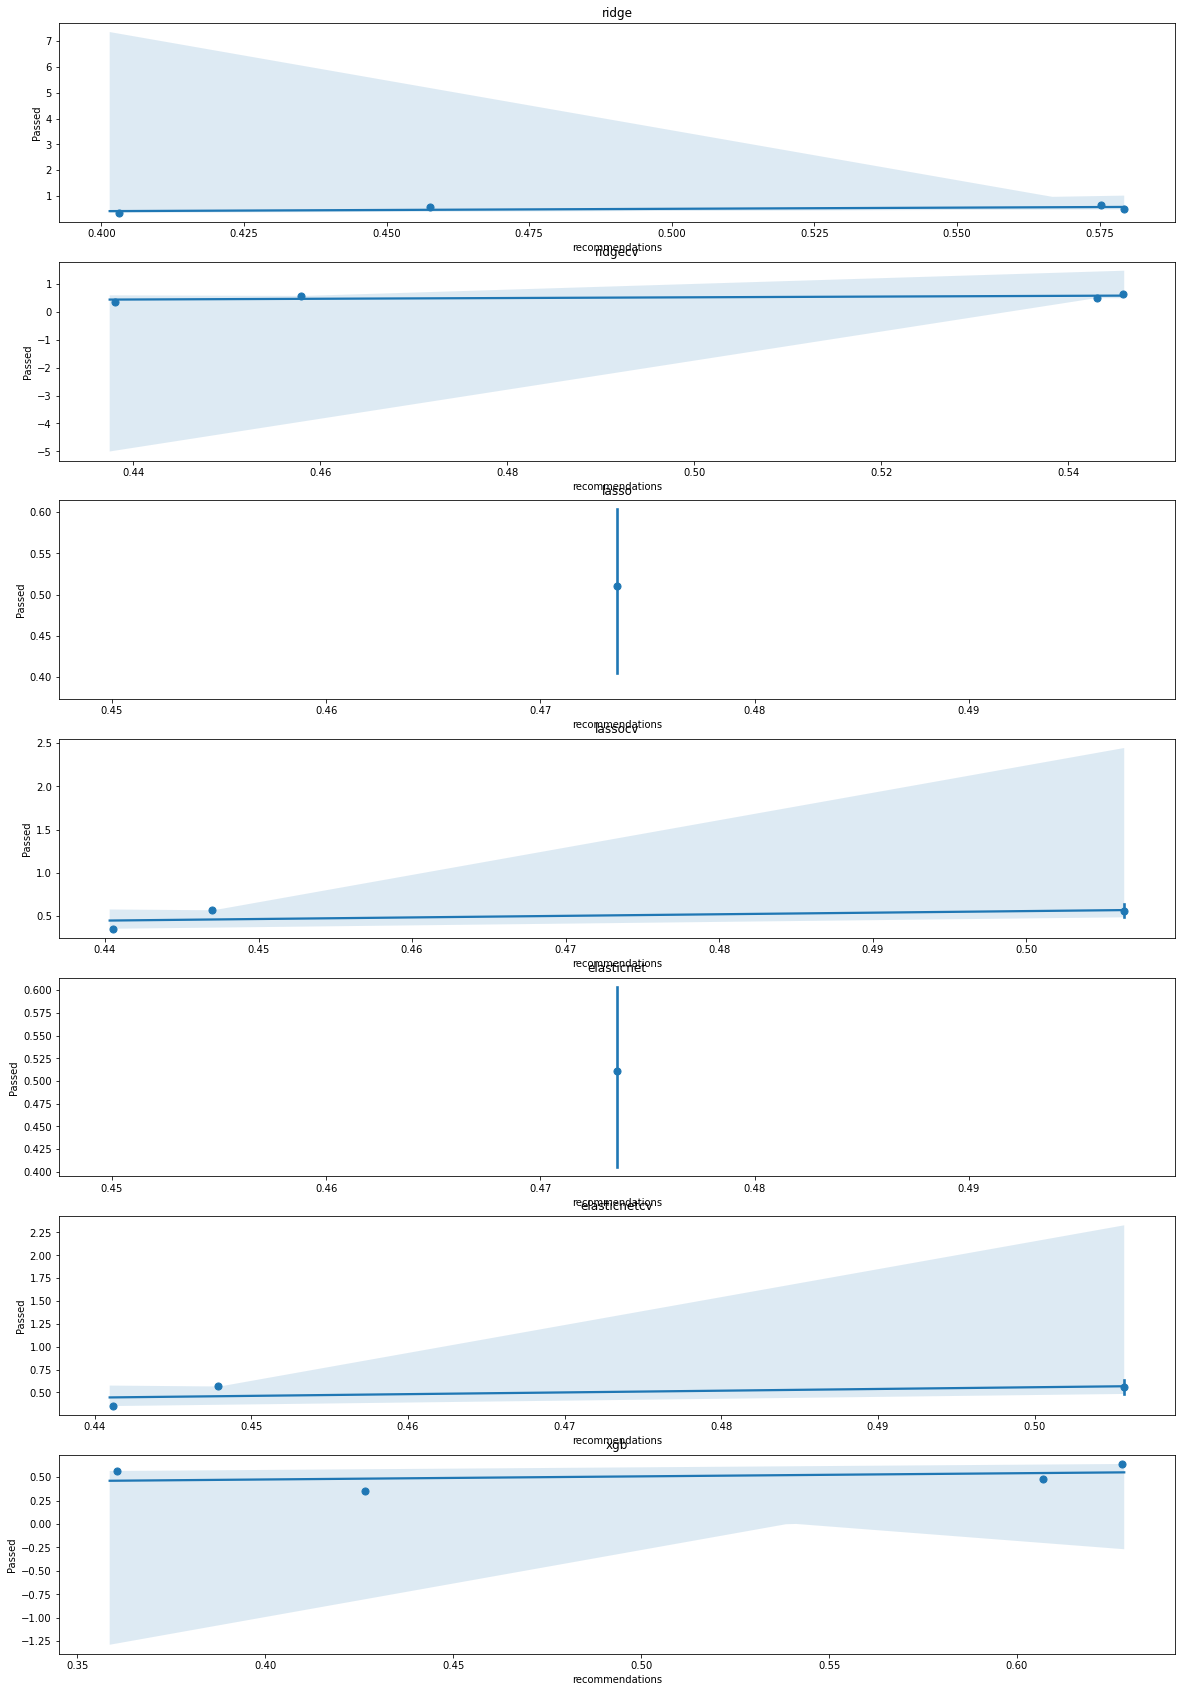

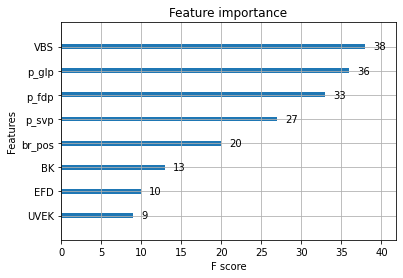

In [45]:
ols(in_trainsort5, in_testsort5, out_trainsort5, out_testsort5)

In [46]:
import statsmodels.formula.api as smf
smfreg = smf.ols('volkja_proz ~ p_svp + p_fdp + p_sps + p_glp + br_pos', data=df).fit(cov_type='hc1')
smfreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            volkja_proz   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     141.2
Date:                Wed, 12 Jan 2022   Prob (F-statistic):           4.01e-99
Time:                        18:05:19   Log-Likelihood:                 397.51
No. Observations:                 611   AIC:                            -783.0
Df Residuals:                     605   BIC:                            -756.5
Df Model:                           5                                         
Covariance Type:                  hc1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4607      0.006     83.744      0.000       0.450       0.471
p_svp          0.0633      0.007      8.809      0.000       0.049       0.077
p_fdp          0.0540      0.010      5.285      0.000       0.034       0.074
p_sps          0.0639      0.006     10.492      0.000       0.052       0.076
p_glp          0.0322      0.012      2.662      0.008       0.008       0.056
br_pos         0.0233      0.010      2.391      0.017       0.004       0.042
==============================================================================
Omnibus:                        1.236   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.539   Jarque-Bera (JB):                1.323
Skew:                          -0.098   Prob(JB):                        0.516
Kurtosis:                       2.884   Cond. No.                         3.91
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [47]:
from linearmodels.panel import PanelOLS
import statsmodels.api as sm

df_index = df
df_index['index'] = df_index.index
df_index = df_index.set_index(["index", "legislatur"])

exog_vars1 = part
exog1 = sm.add_constant(df_index[exog_vars1])
olspart = PanelOLS(df_index.volkja_proz, exog1, entity_effects=False).fit(cov_type='robust')

exog_vars2 = fac
exog2 = sm.add_constant(df_index[exog_vars2])
olsfac = PanelOLS(df_index.volkja_proz, exog2, entity_effects=False, check_rank=False).fit(cov_type='robust')
print(olspart)#,olsfac)

                          PanelOLS Estimation Summary                           
Dep. Variable:            volkja_proz   R-squared:                        0.5066
Estimator:                   PanelOLS   R-squared (Between):              0.5066
No. Observations:                 611   R-squared (Within):               0.0000
Date:                Wed, Jan 12 2022   R-squared (Overall):              0.5066
Time:                        18:05:19   Log-likelihood                    397.51
Cov. Estimator:                Robust                                           
                                        F-statistic:                      124.26
Entities:                         611   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                   F(5,605)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             141.20
                            

D:\IDE\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [48]:
from rdrobust import rdrobust, rdbwselect, rdplot
margin = df.dropna(subset=['legislatur']).legislatur
corruption = df.dropna(subset=['legislatur']).volkja_proz
rdplot(y= corruption, x = margin, nbins = 30, p=2)

ZeroDivisionError: division by zero